<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/kandy_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
print(tf.__version__)

2.15.0


In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# File paths for each DataFrame CSV file
colombo_full_csv_path = '/content/drive/MyDrive/data engineering CW/colombo_df_full.csv'
deniyaya_matara_full_csv_path = '/content/drive/MyDrive/data engineering CW/deniyaya_matara_df_full.csv'
nuwara_eliya_full_csv_path = '/content/drive/MyDrive/data engineering CW/nuwara_eliya_df_full.csv'
bibile_monaragala_full_csv_path = '/content/drive/MyDrive/data engineering CW/bibile_monaragala_df_full.csv'
kurunegala_full_csv_path = '/content/drive/MyDrive/data engineering CW/kurunegala_df_full.csv'
jaffna_full_csv_path = '/content/drive/MyDrive/data engineering CW/jaffna_df_full.csv'
kandy_full_csv_path = '/content/drive/MyDrive/data engineering CW/kandy_df_full.csv'

# Load each DataFrame from the CSV file
colombo_df = pd.read_csv(colombo_full_csv_path, header=0, index_col=0)
deniyaya_matara_df = pd.read_csv(deniyaya_matara_full_csv_path, header=0, index_col=0)
nuwara_eliya_df = pd.read_csv(nuwara_eliya_full_csv_path, header=0, index_col=0)
bibile_monaragala_df = pd.read_csv(bibile_monaragala_full_csv_path, header=0, index_col=0)
kurunegala_df = pd.read_csv(kurunegala_full_csv_path, header=0, index_col=0)
jaffna_df = pd.read_csv(jaffna_full_csv_path, header=0, index_col=0)
kandy_df = pd.read_csv(kandy_full_csv_path, header=0, index_col=0)

In [5]:
# Set index to 'Current Date'
colombo_df.set_index('Current Date', inplace=True)
deniyaya_matara_df.set_index('Current Date', inplace=True)
nuwara_eliya_df.set_index('Current Date', inplace=True)
bibile_monaragala_df.set_index('Current Date', inplace=True)
kurunegala_df.set_index('Current Date', inplace=True)
jaffna_df.set_index('Current Date', inplace=True)
kandy_df.set_index('Current Date', inplace=True)

In [6]:
kandy_df.head()

Location   Next Date  HCHO reading  Specific Humidity  \
Current Date                                                              
2019-01-01    Kandy Proper  2019-01-02      0.000176              14.47   
2019-01-02    Kandy Proper  2019-01-03      0.000092              13.98   
2019-01-03    Kandy Proper  2019-01-04      0.000092              13.55   
2019-01-04    Kandy Proper  2019-01-05      0.000191              13.31   
2019-01-05    Kandy Proper  2019-01-06      0.000122              15.44   

              Relative Humidity  Precipitation  Temperature  Skin Temperature  
Current Date                                                                   
2019-01-01                87.81           0.09        21.72             21.86  
2019-01-02                87.06           0.01        21.18             21.30  
2019-01-03                86.38           0.02        20.96             20.98  
2019-01-04                86.06           0.00        20.68             20.59  
2019-01-05                88.88           0.04        22.26             22.37

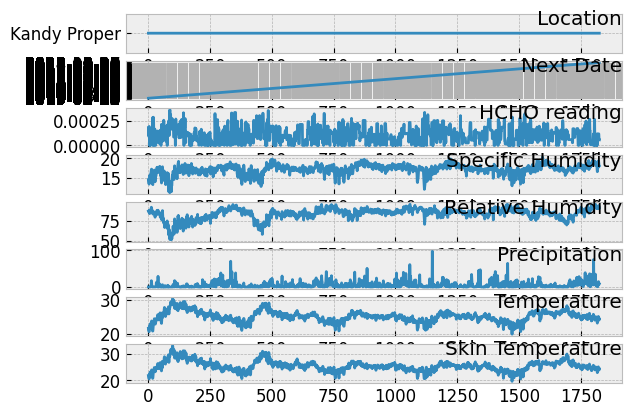

In [7]:
values = kandy_df.values
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(kandy_df.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

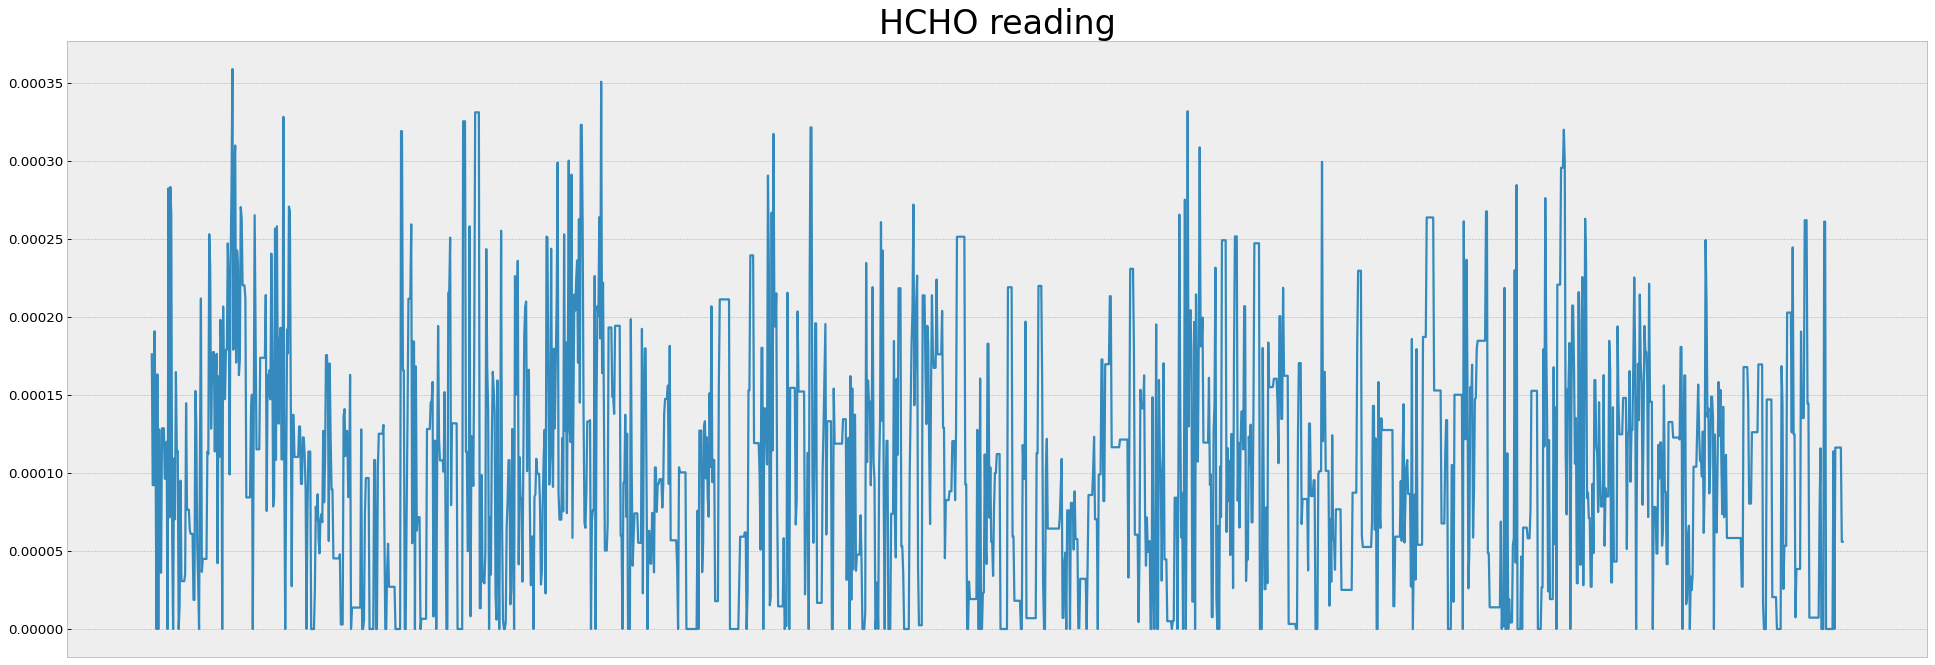

In [8]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)
plt.plot(kandy_df['HCHO reading'])
plt.xticks([])  # Remove x-axis ticks
plt.show()

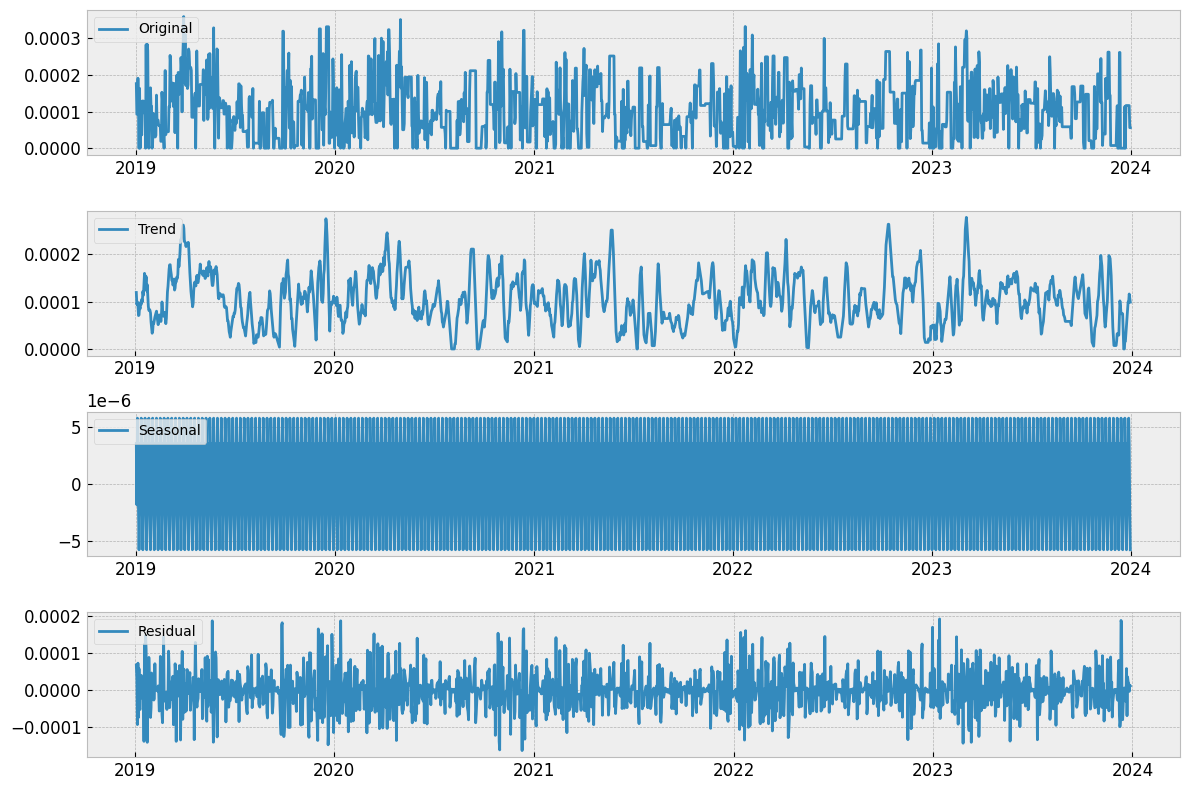

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert index to DatetimeIndex
kandy_df.index = pd.to_datetime(kandy_df.index)

# Perform seasonal decomposition
result = seasonal_decompose(kandy_df['HCHO reading'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



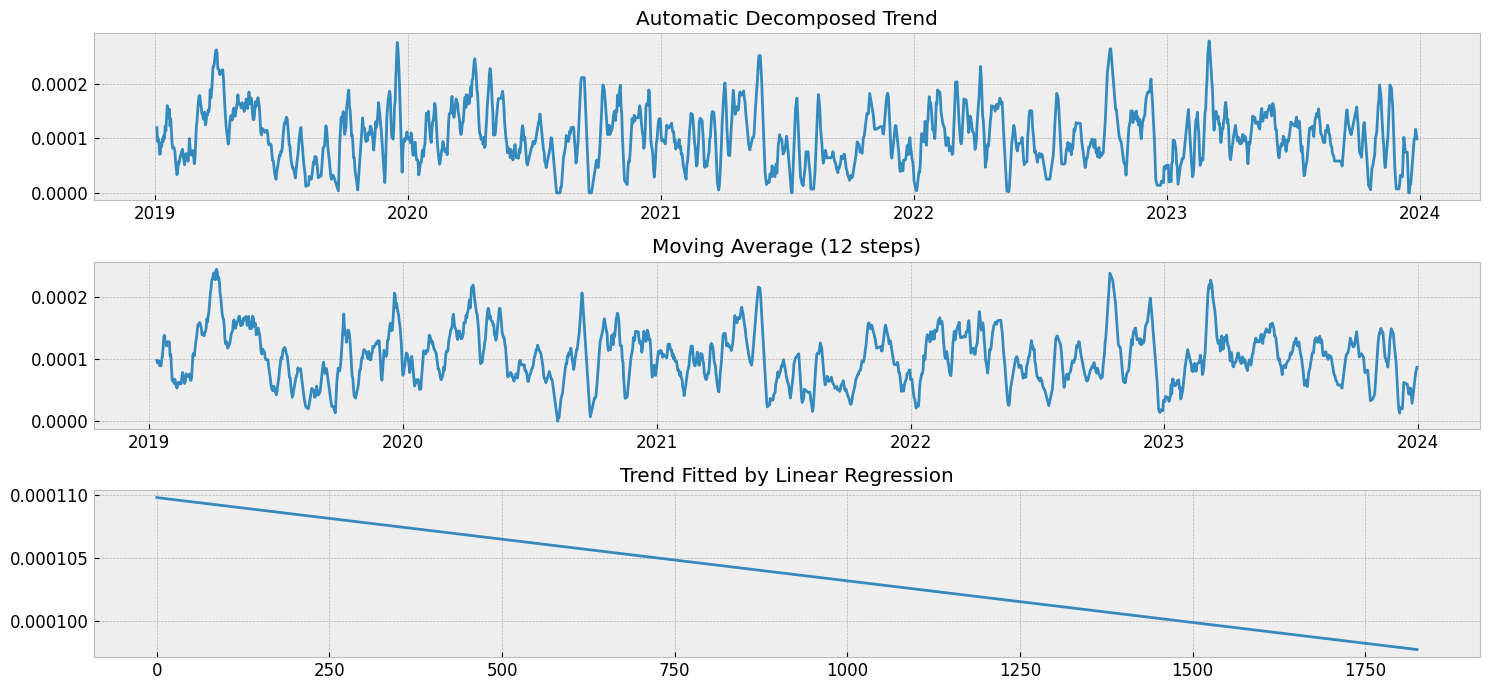

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming colombo_df is your DataFrame containing the 'HCHO reading' data

# Automatic decomposition
result = seasonal_decompose(kandy_df['HCHO reading'], model='additive')

# Moving average
moving_avg = kandy_df['HCHO reading'].rolling(12).mean()

# Fit a linear regression model
X = np.arange(len(kandy_df)).reshape(-1, 1)
y = kandy_df['HCHO reading'].values
model = LinearRegression()
model.fit(X, y)
trend_lr = model.predict(X)

# Plotting
fig = plt.figure(figsize=(15, 7))
layout = (3, 1)
pm_ax = plt.subplot2grid(layout, (0, 0))
mv_ax = plt.subplot2grid(layout, (1, 0))
fit_ax = plt.subplot2grid(layout, (2, 0))

pm_ax.plot(result.trend, label="Automatic decomposed trend")
pm_ax.set_title("Automatic Decomposed Trend")

mv_ax.plot(moving_avg, label="Moving average (12 steps)")
mv_ax.set_title("Moving Average (12 steps)")

fit_ax.plot(trend_lr, label="Trend fitted by linear regression")
fit_ax.set_title("Trend Fitted by Linear Regression")

plt.tight_layout()
plt.show()


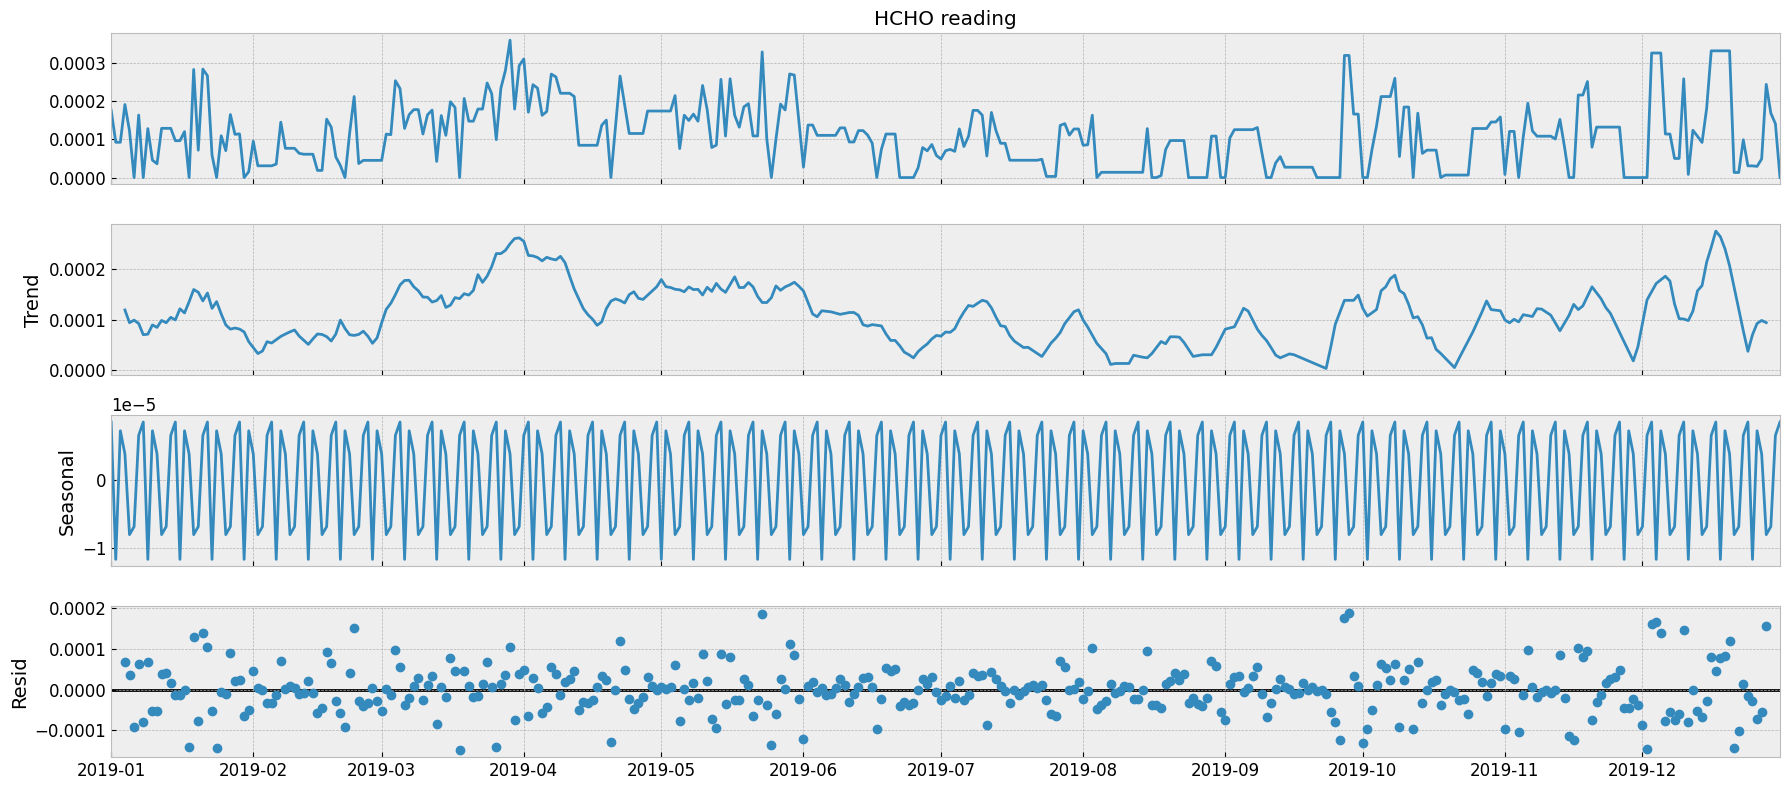

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Set figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Extracting the first year of data
series = kandy_df['HCHO reading'][:365]

# Perform seasonal decomposition
result = seasonal_decompose(series, model='additive')

# Plot the decomposed components
result.plot()

# Show the plot
plt.show()

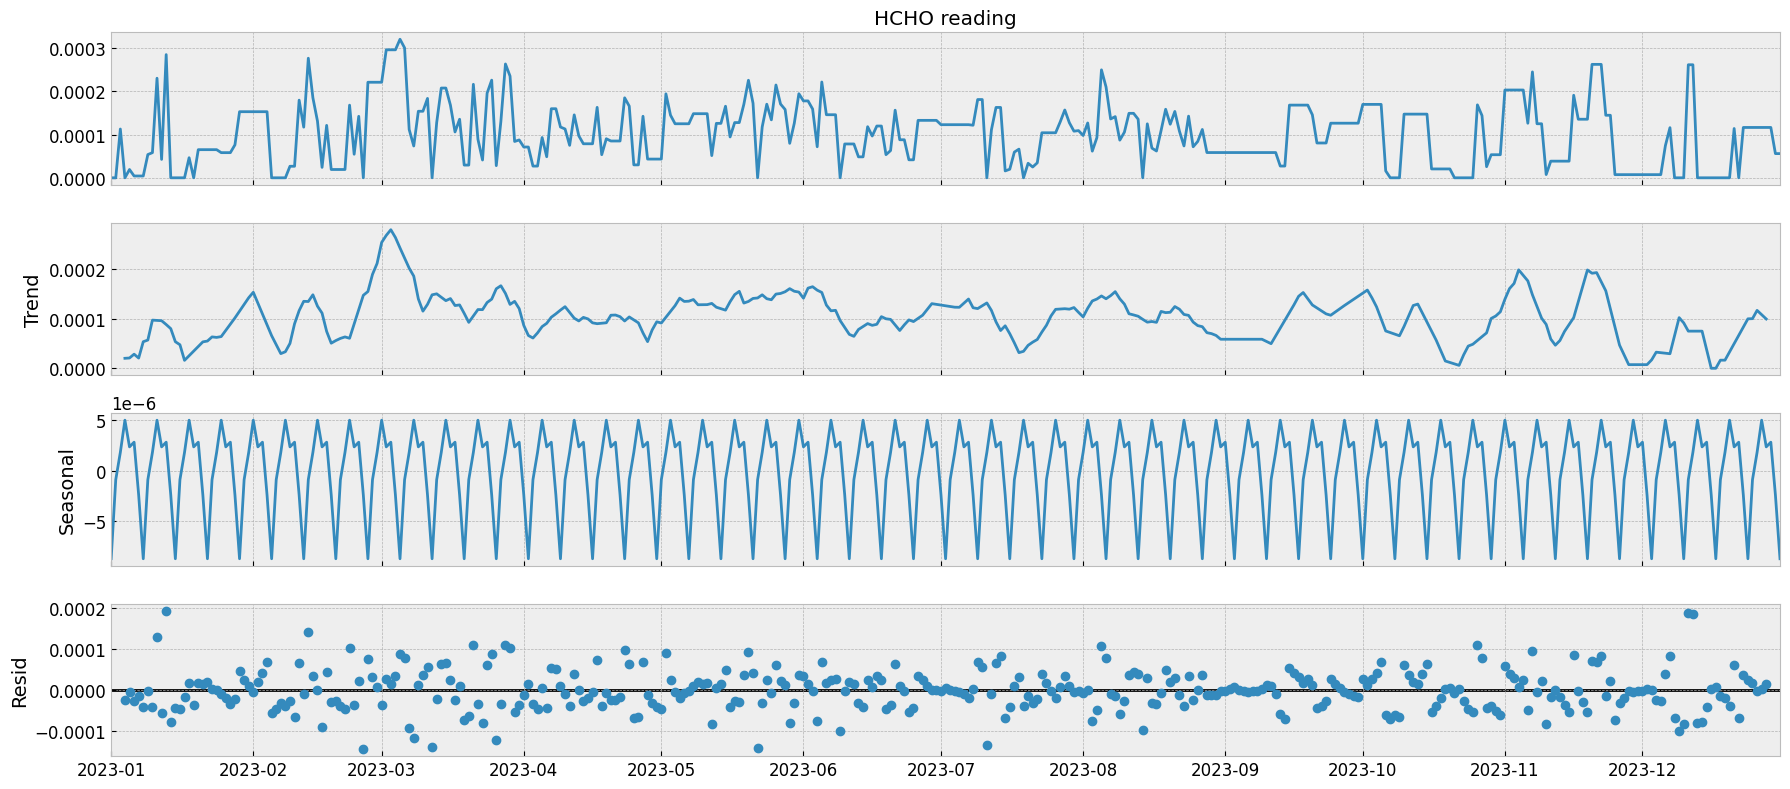

In [12]:
# Set figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Extracting the last year of data
series = kandy_df['HCHO reading'][-365:]

# Perform seasonal decomposition
result = seasonal_decompose(series, model='additive')

# Plot the decomposed components
result.plot()

# Show the plot
plt.show()

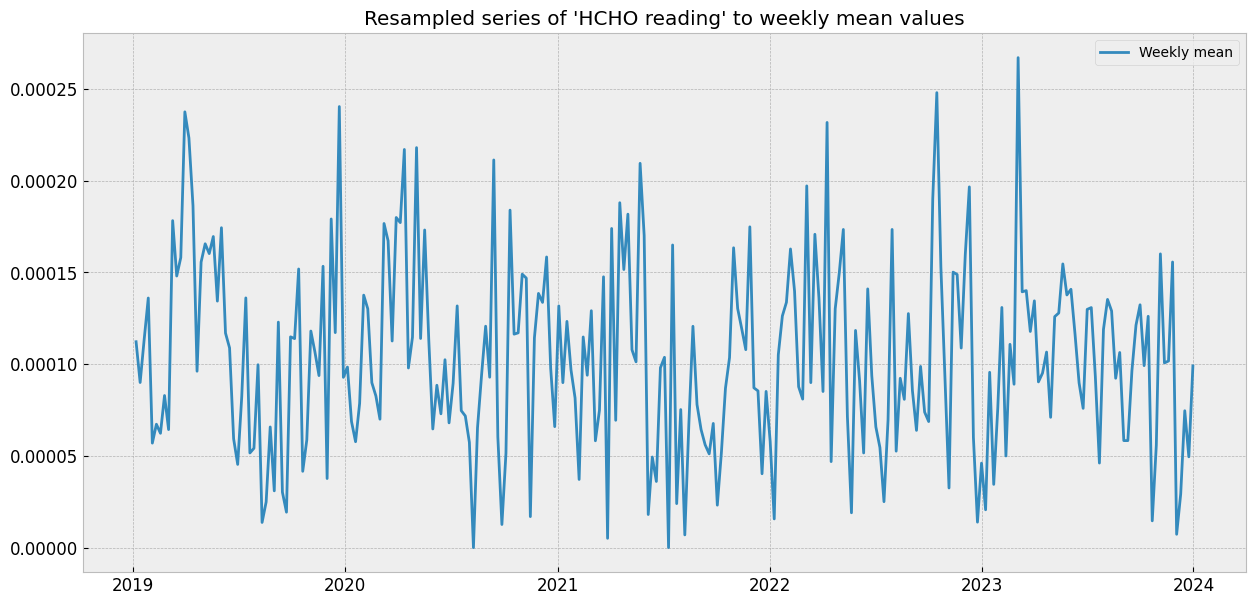

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'HCHO reading' column to numeric, coerce errors to NaN
kandy_df['HCHO reading'] = pd.to_numeric(kandy_df['HCHO reading'], errors='coerce')

# Resample your DataFrame to weekly mean values for the 'HCHO reading' column only
weekly_mean = kandy_df['HCHO reading'].resample('W').mean()

# Plot the weekly mean values
plt.figure(figsize=(15, 7))
plt.plot(weekly_mean, label='Weekly mean')
plt.title("Resampled series of 'HCHO reading' to weekly mean values")
plt.legend()
plt.show()



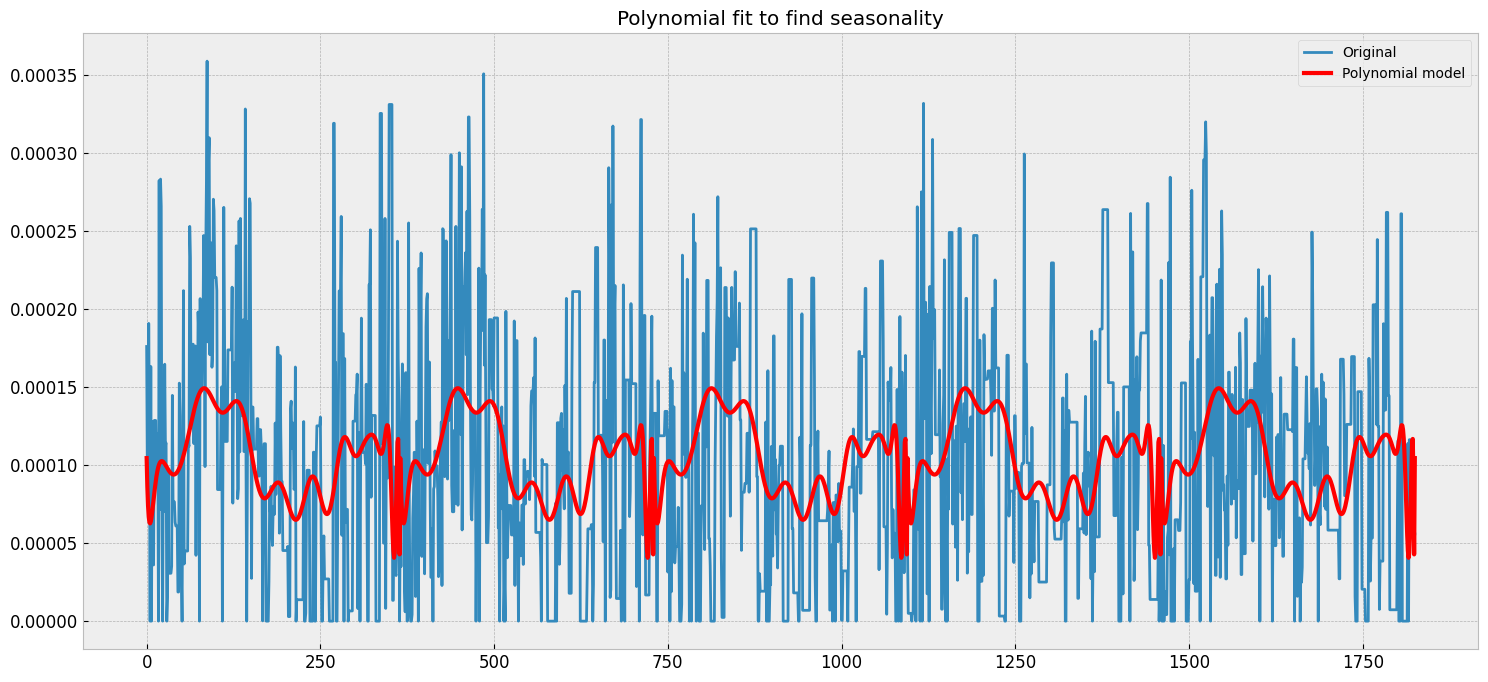

In [14]:

# Extracting the 'HCHO reading' column
series = kandy_df['HCHO reading'].values

# Define X values as days of the year (mod 365)
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100

# Fit polynomial
coef = np.polyfit(X, y, degree)

# Create curve
curve = np.polyval(coef, X)

# Plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='Polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()


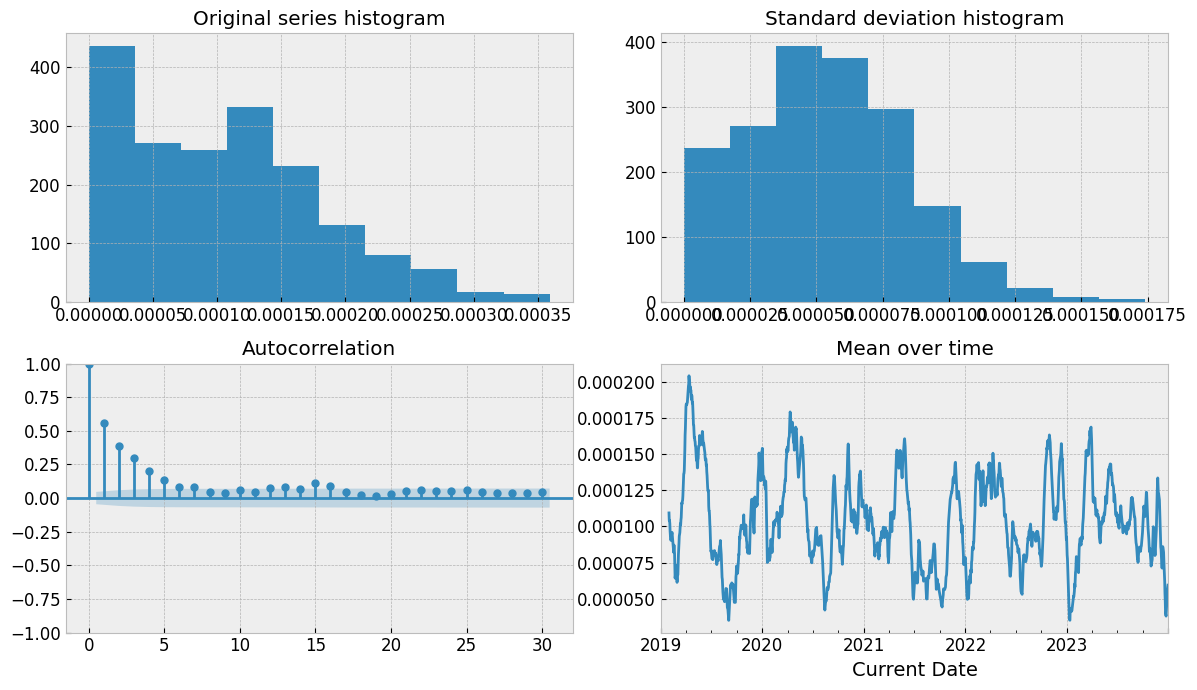

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set up figure and subplots
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

# Plot histogram of the original series
kandy_df['HCHO reading'].hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

# Plot autocorrelation
plot_acf(kandy_df['HCHO reading'], lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

# Calculate rolling standard deviation
rolling_std = kandy_df['HCHO reading'].rolling(7).std()

# Plot histogram of the rolling standard deviation
rolling_std.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

# Calculate rolling mean
rolling_mean = kandy_df['HCHO reading'].rolling(30).mean()

# Plot rolling mean
rolling_mean.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


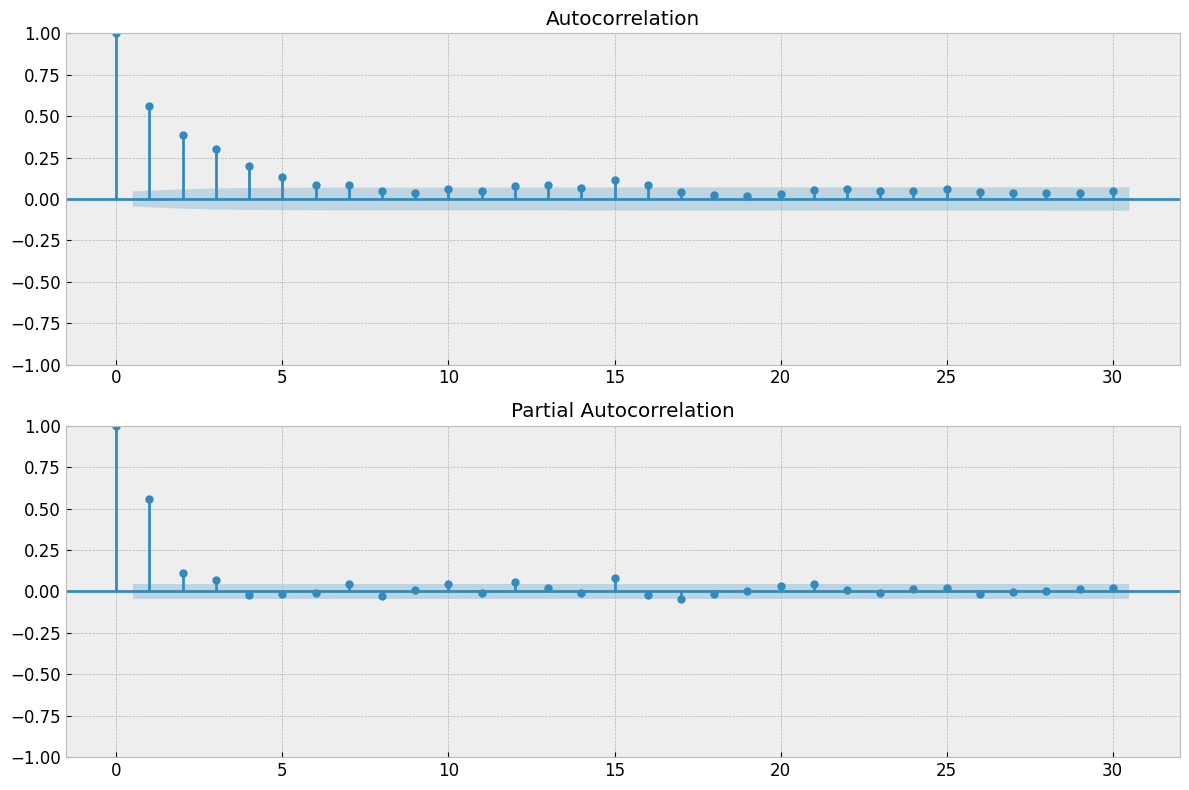

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set up figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot autocorrelation
plot_acf(kandy_df['HCHO reading'], lags=30, ax=ax1)
ax1.set_title("Autocorrelation")

# Plot partial autocorrelation
plot_pacf(kandy_df['HCHO reading'], lags=30, ax=ax2)
ax2.set_title("Partial Autocorrelation")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


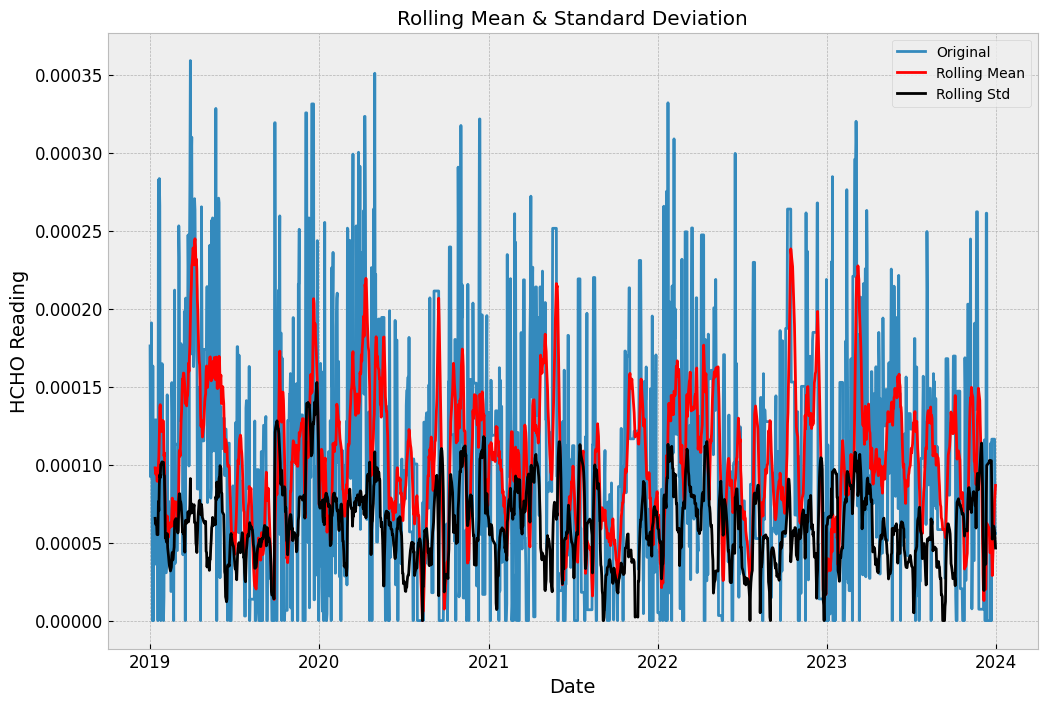

In [17]:
# Determine rolling statistics
rolmean = kandy_df['HCHO reading'].rolling(window=12).mean()
rolstd = kandy_df['HCHO reading'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 8))
plt.plot(kandy_df['HCHO reading'], label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.show()


In [18]:
from statsmodels.tsa.stattools import adfuller

# Extract 'HCHO reading' data
X = kandy_df['HCHO reading'].values

# Perform Augmented Dickey-Fuller test
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.353855147136908
p-value: 2.945070081231198e-13
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


DF Statistic: -4.2572111126082035
This is the test statistic calculated by the ADF test. It is used to determine whether the null hypothesis of non-stationarity can be rejected. In this case, the ADF statistic is negative, indicating that the time series data is likely to be stationary.
p-value: 0.0005264219736638642
This is the p-value associated with the ADF statistic. It represents the probability of observing the ADF statistic if the null hypothesis of non-stationarity is true. In this case, the p-value is significantly less than 0.05 (commonly used significance level), indicating strong evidence against the null hypothesis. Therefore, we can reject the null hypothesis and conclude that the data is stationary.
Critical Values:
These are the critical values at different levels of significance (1%, 5%, and 10%). They represent thresholds for the ADF statistic beyond which we can reject the null hypothesis. In this case, the ADF statistic is lower than all the critical values, further supporting the rejection of the null hypothesis.

# **Splitting the dataset**

In [19]:
# Set the split date
split_date = '2023-01-01'

# Split the DataFrame into training and testing sets
kandy_training = kandy_df.loc[kandy_df.index <= split_date]
kandy_test = kandy_df.loc[kandy_df.index > split_date]

# Print the lengths of the training and testing sets
print(f"{len(kandy_training)} days of training data \n {len(kandy_test)} days of testing data ")

# Save the training and testing sets to CSV files
kandy_training.to_csv('/content/drive/MyDrive/data engineering CW/kandy_training.csv')
kandy_test.to_csv('/content/drive/MyDrive/data engineering CW/kandy_test.csv')


1462 days of training data 
 364 days of testing data 


# **AR model**

In [20]:
from tqdm import tqdm  # Import tqdm for progress bar
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Initialize dictionaries to store results and predictions
resultsDict = {}
predictionsDict = {}

# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = kandy_df['HCHO reading'][:len(kandy_training)+t]
    model = AutoReg(temp_train, lags=1)  # You can adjust the number of lags as needed
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat.append(predictions[0])

yhat = pd.Series(yhat, index=kandy_test.index)
resultsDict['AR'] = mean_squared_error(kandy_test['HCHO reading'], yhat)
predictionsDict['AR'] = yhat


100%|██████████| 364/364 [00:08<00:00, 44.82it/s]


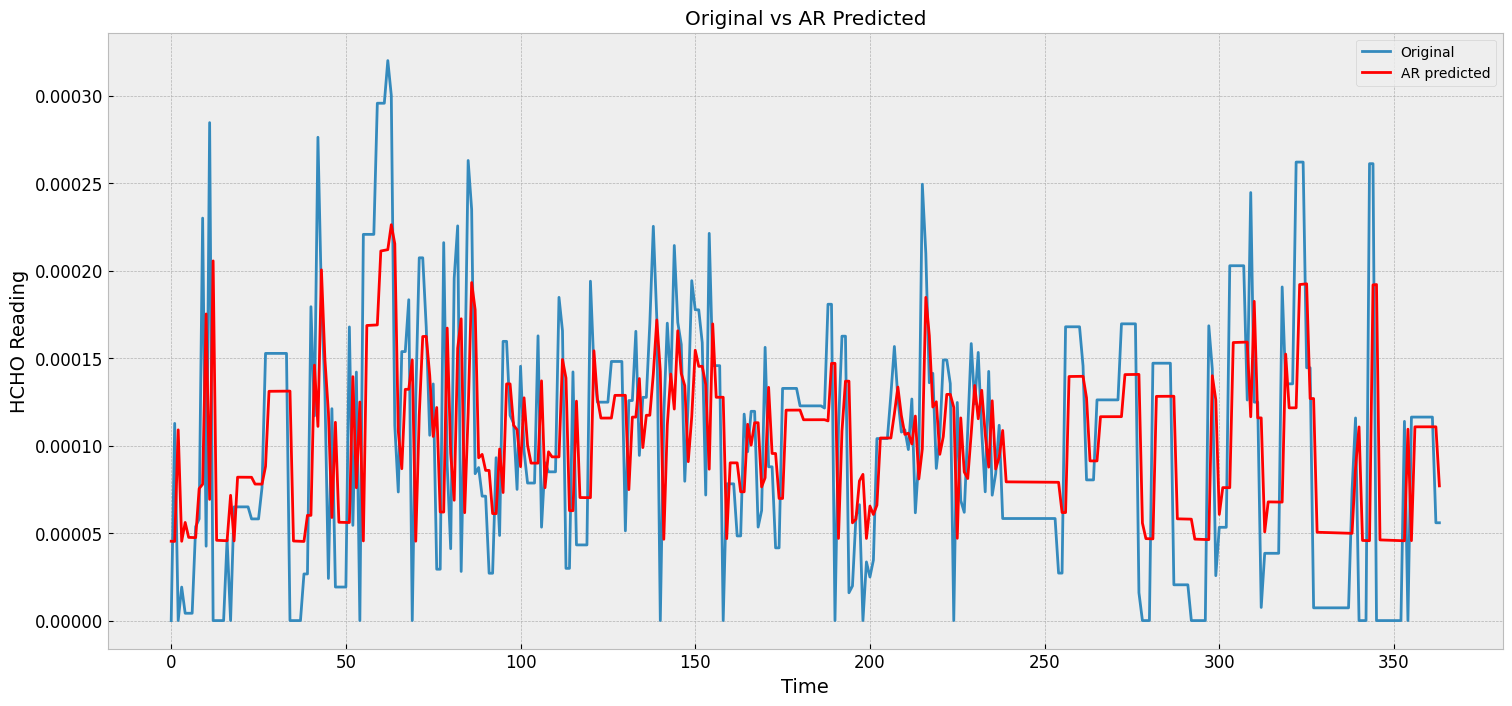

In [21]:
# Plot the results
plt.plot(kandy_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()
plt.title('Original vs AR Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


# ***MA model***

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = kandy_df['HCHO reading'][:len(kandy_training)+t]
    model = ARIMA(temp_train, order=(0, 0, 1))  # MA model with order (0, 0, 1)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=1)
    yhat.append(predictions[0])

# Convert predictions to a pandas Series
yhat = pd.Series(yhat, index=kandy_test.index)

# Calculate and store the evaluation metrics
resultsDict['MA'] = mean_squared_error(kandy_test['HCHO reading'], yhat)
predictionsDict['MA'] = yhat


100%|██████████| 364/364 [15:07<00:00,  2.49s/it]


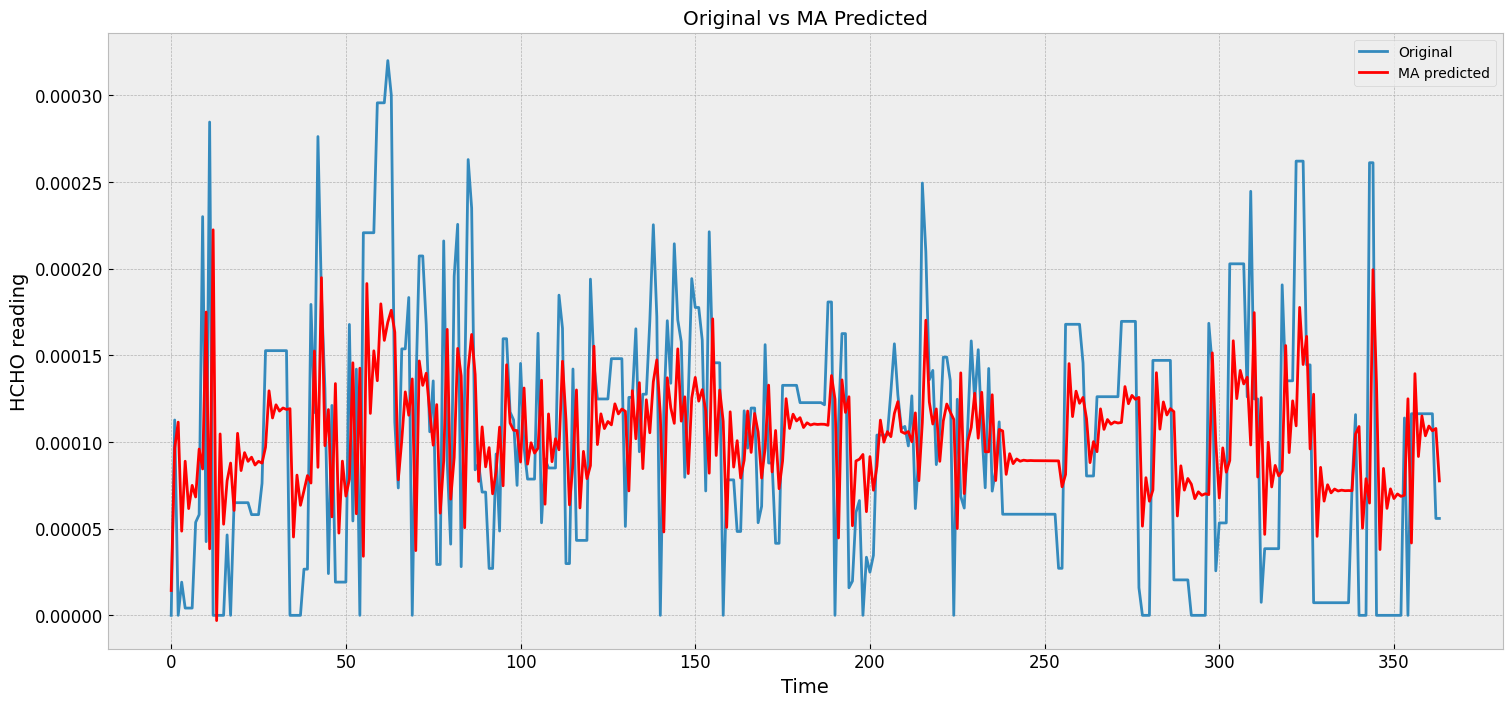

In [23]:
# Plot the original data and the predicted values of Moving Average
plt.plot(kandy_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()
plt.title('Original vs MA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.show()


# ***AR vs MA***

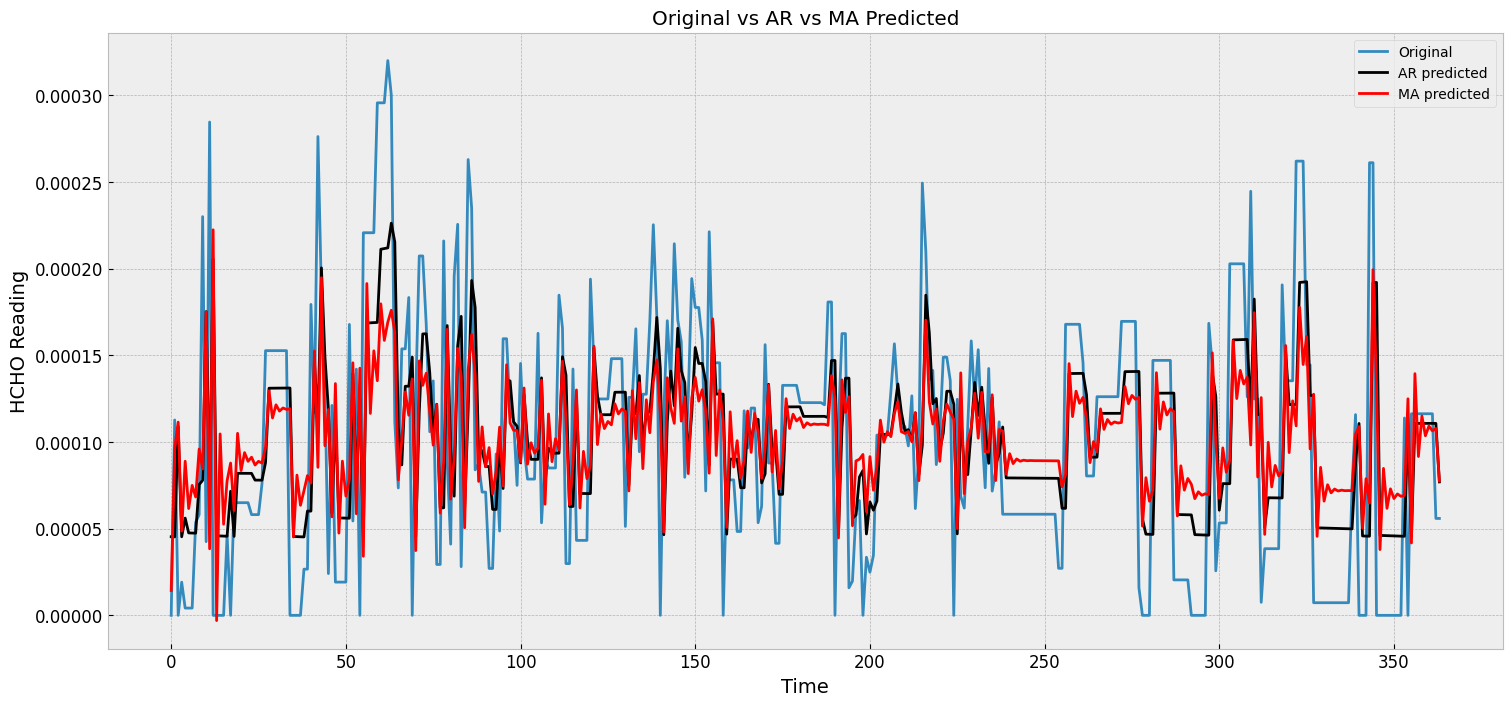

In [24]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(kandy_test['HCHO reading'].values, label='Original')

# Plot the predicted values of Autoregression (AR)
plt.plot(predictionsDict['AR'].values, color='black', label='AR predicted')

# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['MA'].values, color='red', label='MA predicted')

# Add labels and legend
plt.title('Original vs AR vs MA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.legend()

# Show the plot
plt.show()



# ***ARMA model***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Assuming colombo_df is your DataFrame containing the 'HCHO reading' data

# ARIMA example
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = kandy_df['HCHO reading'][:len(kandy_training) + t]
    model = ARIMA(temp_train, order=(1, 0, 1))  # ARMA model with p=1, q=1
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=1)[0]
    yhat.append(predictions)

yhat = pd.Series(yhat, index=kandy_test.index)
resultsDict['ARMA'] = mean_squared_error(kandy_test['HCHO reading'], yhat)
predictionsDict['ARMA'] = yhat

100%|██████████| 364/364 [14:31<00:00,  2.39s/it]


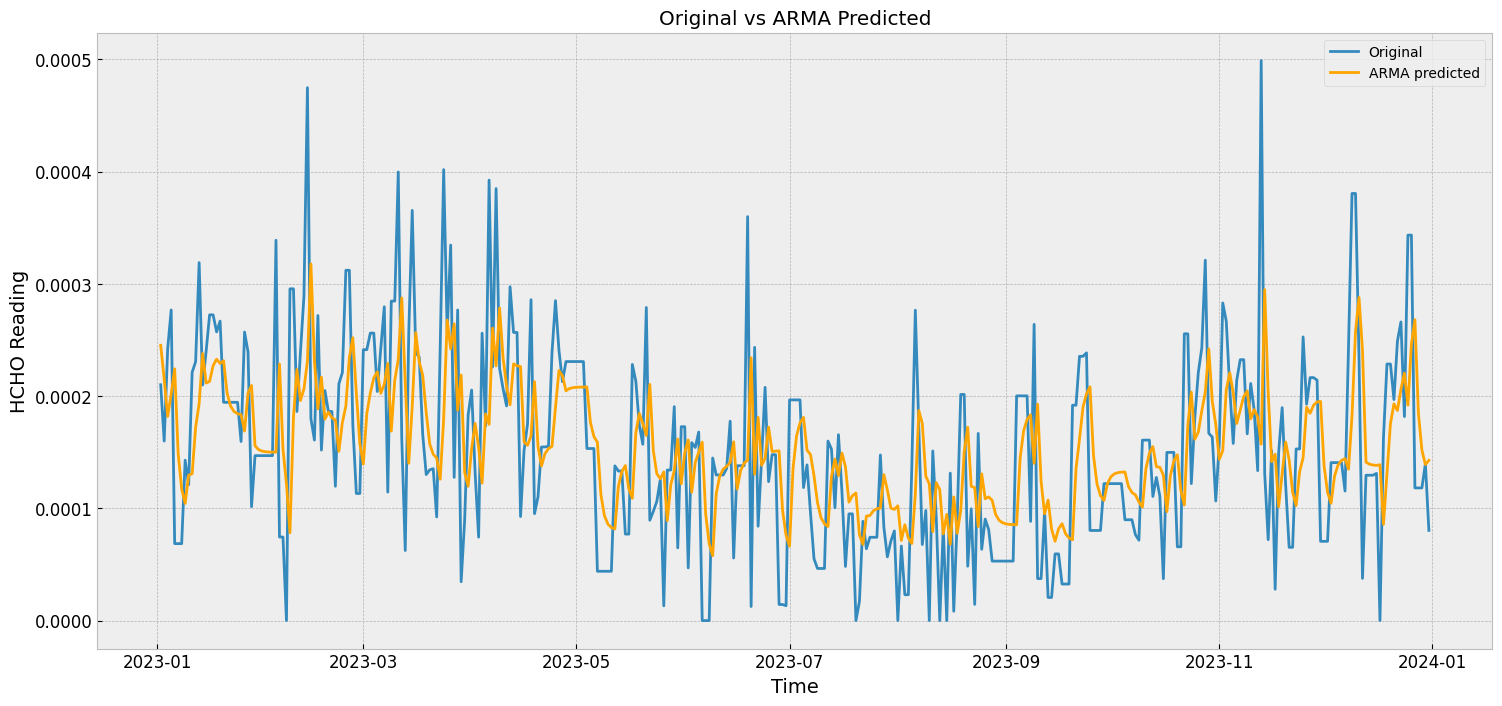

In [ ]:
# Plot the results
plt.plot(kandy_test.index, kandy_test['HCHO reading'].values, label='Original')
plt.plot(kandy_test.index, predictionsDict['ARMA'], color='orange', label='ARMA predicted')
plt.legend()
plt.title('Original vs ARMA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


# ***AR vs MA vs ARMA***

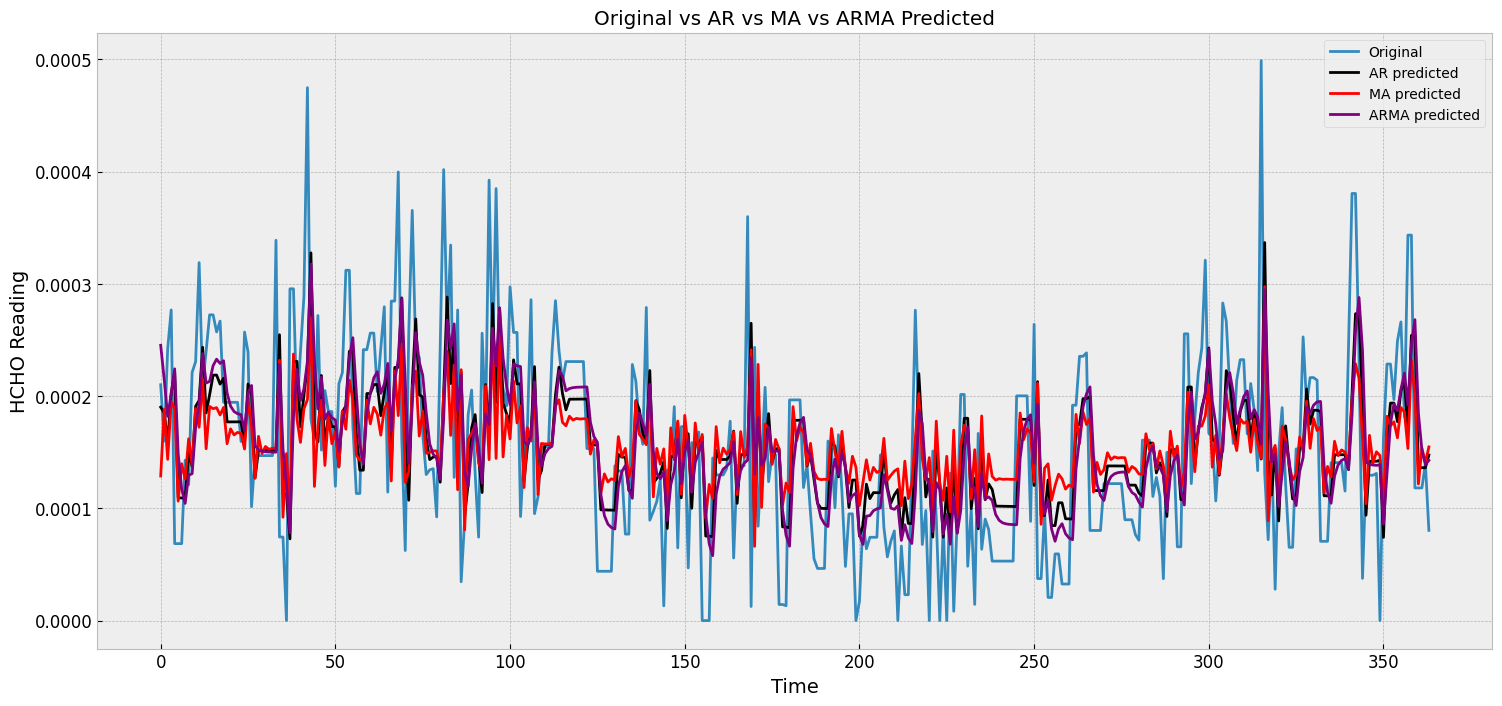

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(kandy_test['HCHO reading'].values, label='Original')

# Plot the predicted values of Autoregression (AR)
plt.plot(predictionsDict['AR'].values, color='black', label='AR predicted')

# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['MA'].values, color='red', label='MA predicted')


# Plot the predicted values of Moving Average (MA)
plt.plot(predictionsDict['ARMA'].values, color='purple', label='ARMA predicted')

# Add labels and legend
plt.title('Original vs AR vs MA vs ARMA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.legend()

# Show the plot
plt.show()

# ***AUTO ARIMA***

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Build the model
model = auto_arima(kandy_training['HCHO reading'], trace=True,
                    error_action='ignore', suppress_warnings=True,
                    seasonal=True, m=12, stepwise=True)
model.fit(kandy_training['HCHO reading'])

# Predictions
start_index = kandy_test.index.min()
end_index = kandy_test.index.max()
pred = model.predict(n_periods=len(kandy_test))
pred = pd.DataFrame(pred, index=kandy_test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23481.893, Time=29.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-23010.599, Time=0.70 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23233.572, Time=7.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23398.255, Time=17.93 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-23012.652, Time=0.87 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23483.633, Time=22.57 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23489.281, Time=8.16 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23486.536, Time=14.72 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-23467.787, Time=3.49 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-23451.621, Time=9.39 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23490.973, Time=6.50 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-23488.212, Time=18.55 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-23485.288, Time=10.81 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=-23483.555,

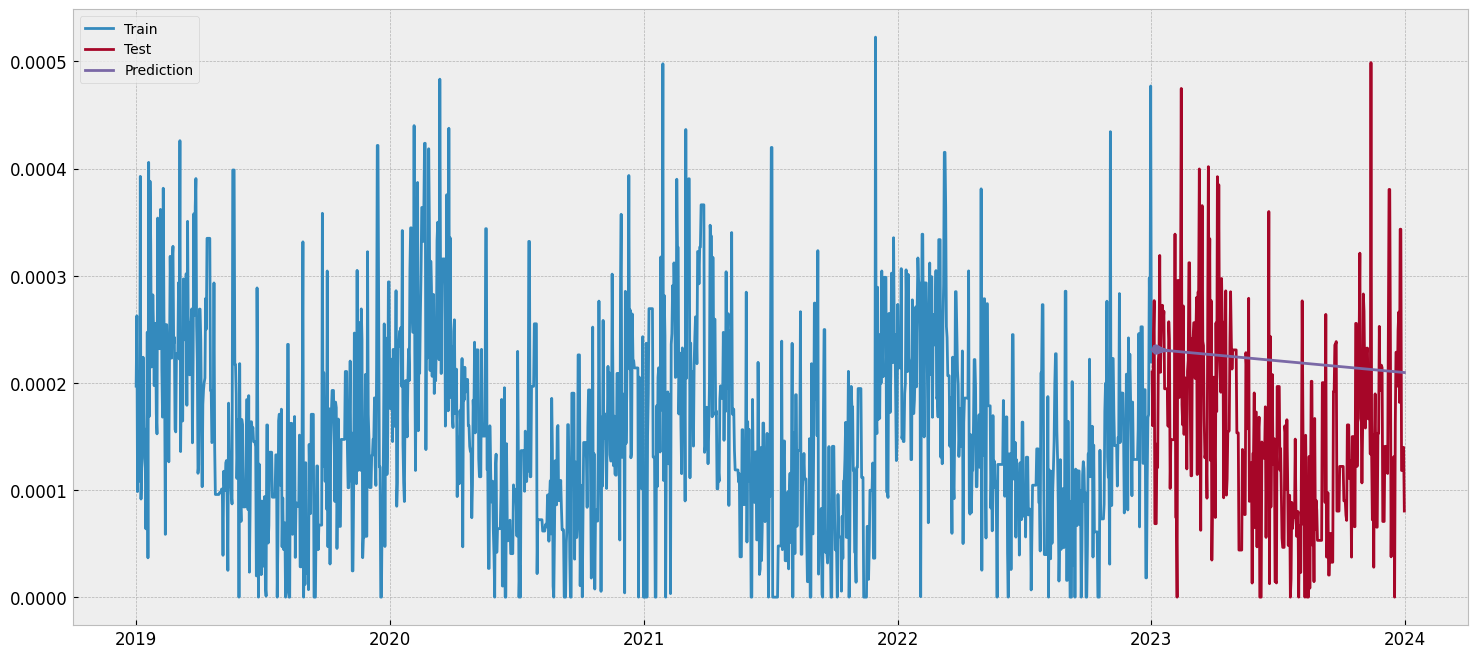

In [ ]:
# Plot the predictions for the test set
plt.plot(kandy_training['HCHO reading'], label='Train')
plt.plot(kandy_test['HCHO reading'], label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score for AR model
r2_ar = r2_score(kandy_test['HCHO reading'], predictionsDict['AR'])
print("R2 score for AR model:", r2_ar)

R2 score for AR model: 0.21028458033373365


In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00


In [ ]:
import evaluate

# ***SARIMA***

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA example
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = colombo_df['HCHO reading'][:len(kandy_training) + t]
    model = SARIMAX(temp_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)



100%|██████████| 364/364 [03:31<00:00,  1.72it/s]


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate(y_true, y_pred):
    """
    Evaluates the performance of the forecast using Mean Squared Error (MSE)
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [ ]:

resultsDict['SARIMAX'] = evaluate(kandy_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

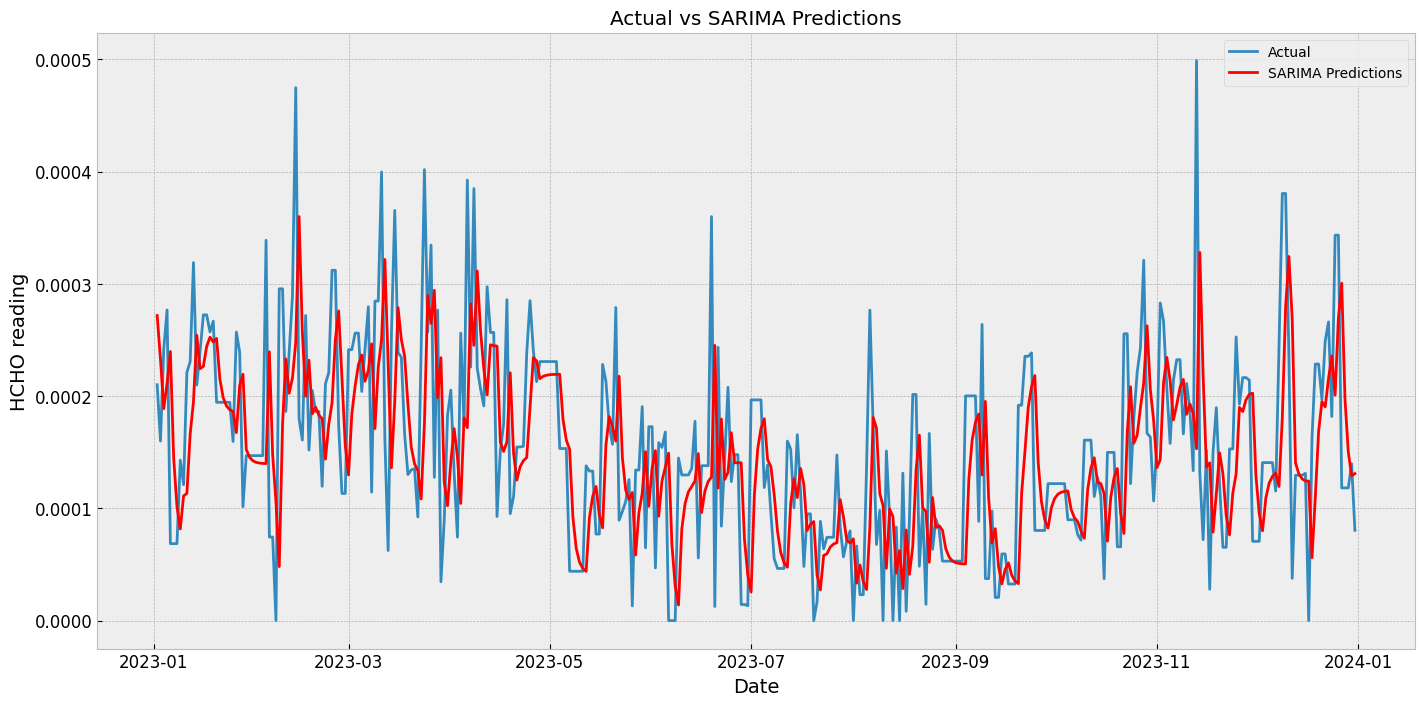

In [ ]:
# Convert index to datetime if it's not already in datetime format
kandy_test.index = pd.to_datetime(kandy_test.index)
plt.figure(figsize=(17, 8))
# Plot the actual values and SARIMA predictions
plt.plot(kandy_test.index, kandy_test['HCHO reading'], label='Actual')
plt.plot(kandy_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the metrics for SARIMA
sarima_r2 = r2_score(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mae = mean_absolute_error(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_medae = median_absolute_error(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mse = mean_squared_error(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_msle = mean_squared_log_error(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])
sarima_mape = mean_absolute_percentage_error(kandy_test['HCHO reading'], predictionsDict['SARIMAX'])

# Calculate the metrics for ARMA
arma_r2 = r2_score(kandy_test['HCHO reading'], predictionsDict['ARMA'])
arma_mae = mean_absolute_error(kandy_test['HCHO reading'], predictionsDict['ARMA'])
arma_medae = median_absolute_error(kandy_test['HCHO reading'], predictionsDict['ARMA'])
arma_mse = mean_squared_error(kandy_test['HCHO reading'], predictionsDict['ARMA'])
arma_msle = mean_squared_log_error(kandy_test['HCHO reading'], predictionsDict['ARMA'])
arma_mape = mean_absolute_percentage_error(kandy_test['HCHO reading'], predictionsDict['ARMA'])

# Print the metrics
print("SARIMA Metrics:")
print("R squared:", sarima_r2)
print("Mean Absolute Error:", sarima_mae)
print("Median Absolute Error:", sarima_medae)
print("Mean Squared Error:", sarima_mse)
print("Mean Squared Logarithmic Error:", sarima_msle)
print("Mean Absolute Percentage Error:", sarima_mape)
print()
print("ARMA Metrics:")
print("R squared:", arma_r2)
print("Mean Absolute Error:", arma_mae)
print("Median Absolute Error:", arma_medae)
print("Mean Squared Error:", arma_mse)
print("Mean Squared Logarithmic Error:", arma_msle)
print("Mean Absolute Percentage Error:", arma_mape)


SARIMA Metrics:
R squared: 0.1555325984945518
Mean Absolute Error: 6.105494678026378e-05
Median Absolute Error: 4.6147879889968066e-05
Mean Squared Error: 6.752438394235219e-09
Mean Squared Logarithmic Error: 6.749914108373889e-09
Mean Absolute Percentage Error: inf

ARMA Metrics:
R squared: 0.22767865581088298
Mean Absolute Error: 6.0034601747061916e-05
Median Absolute Error: 4.70853948217161e-05
Mean Squared Error: 6.175551937106126e-09
Mean Squared Logarithmic Error: 6.173250038232796e-09
Mean Absolute Percentage Error: inf


In [ ]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Perform auto SARIMA
model = auto_arima(kandy_training['HCHO reading'],
                   seasonal=True, m=12,
                   stepwise=True, trace=True,
                   error_action='ignore', suppress_warnings=True)

# Fit the SARIMA model
model.fit(kandy_training['HCHO reading'])

# Predictions
pred = model.predict(n_periods=len(kandy_test))
pred = pd.Series(pred, index=kandy_test.index)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23481.893, Time=24.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-23010.599, Time=0.26 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23233.572, Time=1.88 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23398.255, Time=5.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-23012.652, Time=0.18 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23483.633, Time=9.62 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23489.281, Time=2.81 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23486.536, Time=13.33 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-23467.787, Time=3.46 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-23451.621, Time=9.38 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23490.973, Time=6.51 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-23488.212, Time=17.79 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-23485.288, Time=11.14 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=-23483.555, T

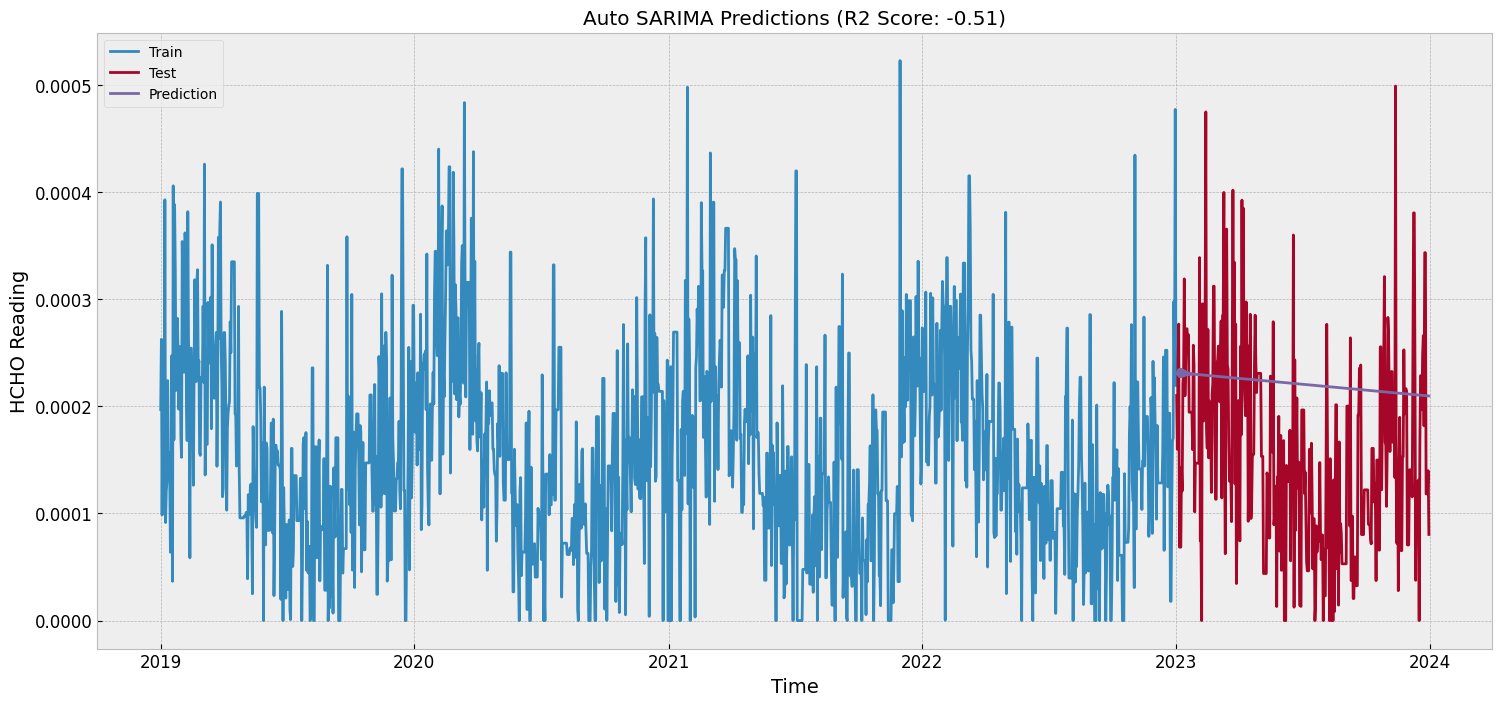

In [ ]:
# Calculate R2 score
r2 = r2_score(kandy_test['HCHO reading'], pred)

# Plot the predictions for the test set
plt.plot(kandy_training['HCHO reading'], label='Train')
plt.plot(kandy_test['HCHO reading'], label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.title(f'Auto SARIMA Predictions (R2 Score: {r2:.2f})')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()


In [ ]:
# Create lagged features
def create_lagged_features(data, lag=1):
    for i in range(1, lag + 1):
        data[f'lag_{i}'] = data['HCHO reading'].shift(i)
    return data.dropna()

# Apply lagged features to the dataset
colombo_training = create_lagged_features(colombo_training, lag=3)
kandy_test = create_lagged_features(kandy_test, lag=3)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# SARIMA example
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = colombo_df['HCHO reading'][:len(kandy_training) + t]
    model = SARIMAX(temp_train, order=(3, 0, 3), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)


100%|██████████| 361/361 [12:37<00:00,  2.10s/it]


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate(y_true, y_pred):
    """
    Evaluates the performance of the forecast using Mean Squared Error (MSE)
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [ ]:

resultsDict['SARIMAX'] = evaluate(kandy_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

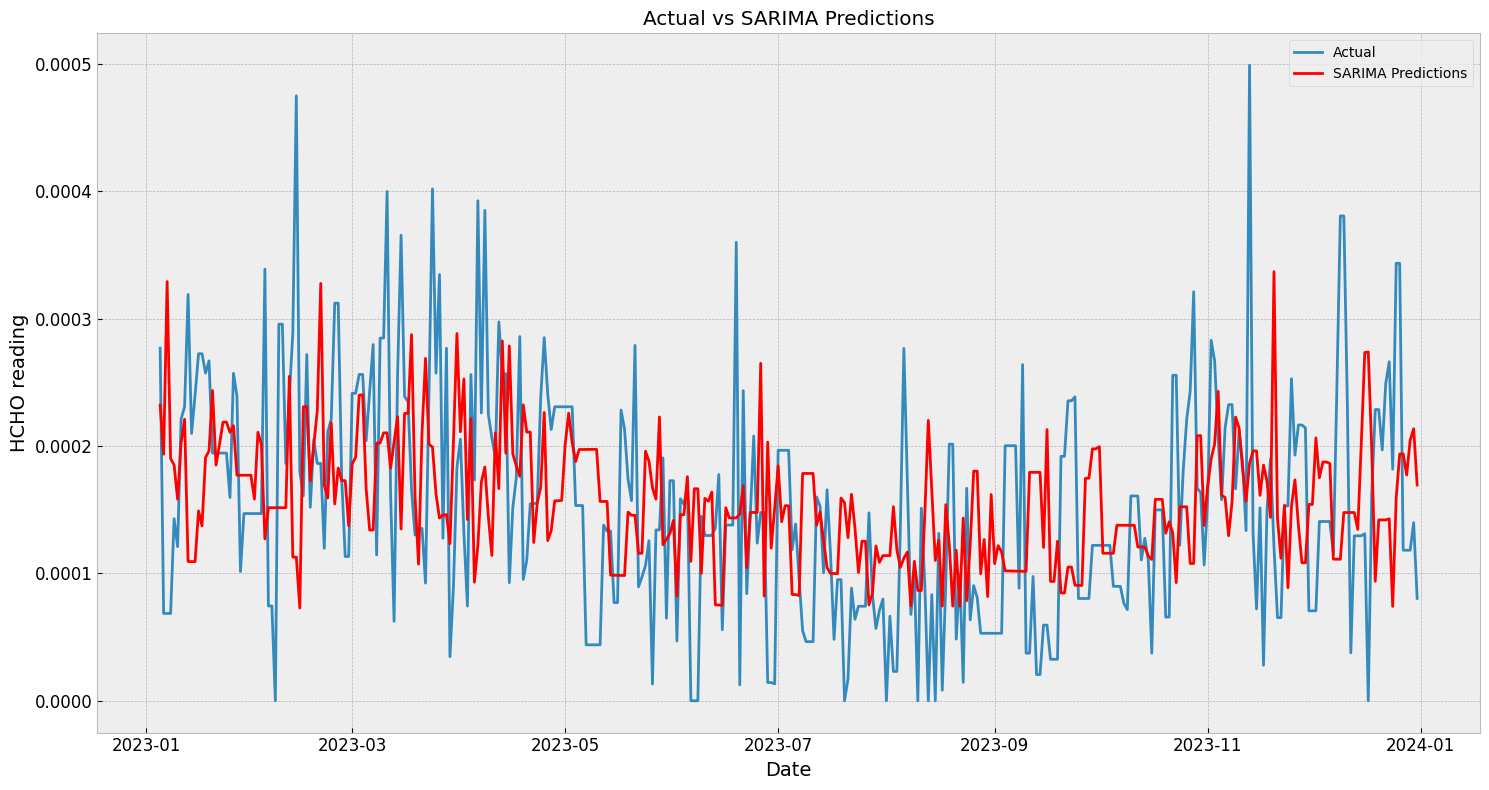

In [ ]:
# Convert index to datetime if it's not already in datetime format
kandy_test.index = pd.to_datetime(kandy_test.index)

# Set figure size
plt.figure(figsize=(15, 8))

# Plot the actual values and SARIMA predictions
plt.plot(kandy_test.index, kandy_test['HCHO reading'], label='Actual', linewidth=2)
plt.plot(kandy_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions', linewidth=2)
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# SARIMA example
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = colombo_df['HCHO reading'][:len(kandy_training) + t]
    model = SARIMAX(temp_train, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(predictions)

yhat = pd.concat(yhat)


100%|██████████| 361/361 [09:06<00:00,  1.52s/it]


In [ ]:

resultsDict['SARIMAX'] = evaluate(kandy_test['HCHO reading'], yhat.values)
predictionsDict['SARIMAX'] = yhat.values

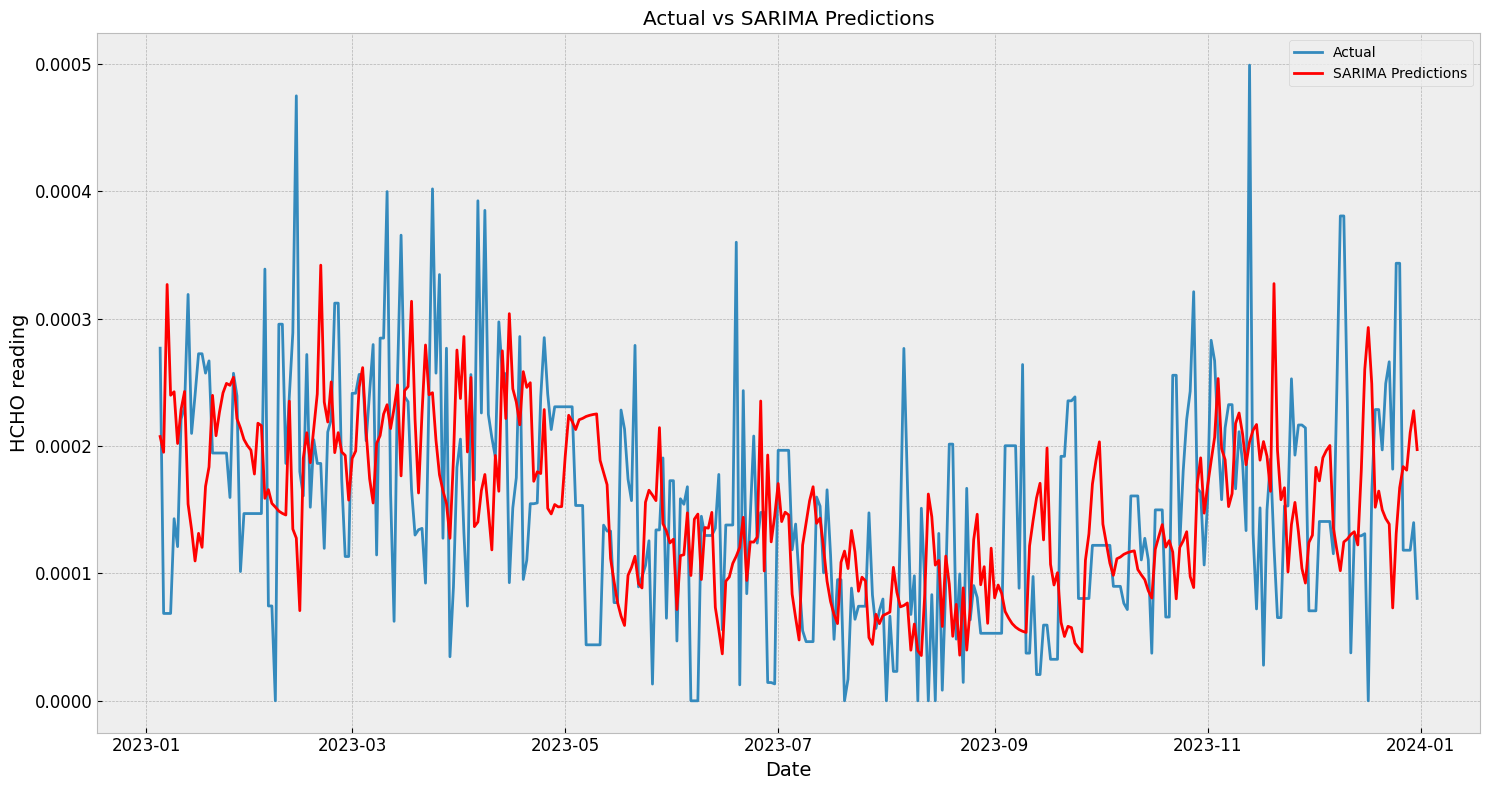

In [ ]:

# Set figure size
plt.figure(figsize=(15, 8))

# Plot the actual values and SARIMA predictions
plt.plot(kandy_test.index, kandy_test['HCHO reading'], label='Actual', linewidth=2)
plt.plot(kandy_test.index, predictionsDict['SARIMAX'], color='red', label='SARIMA Predictions', linewidth=2)
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **Trying Multivariate models**

In [ ]:
from sklearn.preprocessing import StandardScaler

def create_time_features(df, target=None):
    """
    Creates time series features from datetime index and includes relative humidity
    """
    df['Current Date'] = df.index
    df['relative_humidity'] = kandy_df['Relative Humidity']  # Add Relative Humidity column
    df['Skin Temperature'] = kandy_df['Skin Temperature']
    X = df.drop(['Current Date','Location','Next Date'], axis=1)  # Drop 'Current Date' before scaling
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

X_train_df, y_train = create_time_features(kandy_training, target='HCHO reading')
X_test_df, y_test = create_time_features(kandy_test, target='HCHO reading')


scaler = StandardScaler()
scaler.fit(X_train_df)
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)





In [ ]:
print(X_train_df.columns)

Index(['Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'lag_1', 'lag_2', 'lag_3',
       'relative_humidity'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Linear models
# Bayesian Ridge
reg = linear_model.BayesianRidge()
reg.fit(X_train_imputed, y_train)
yhat = reg.predict(X_test_imputed)

resultsDict['BayesianRidge'] = evaluate(kandy_test['HCHO reading'], yhat)
predictionsDict['BayesianRidge'] = yhat

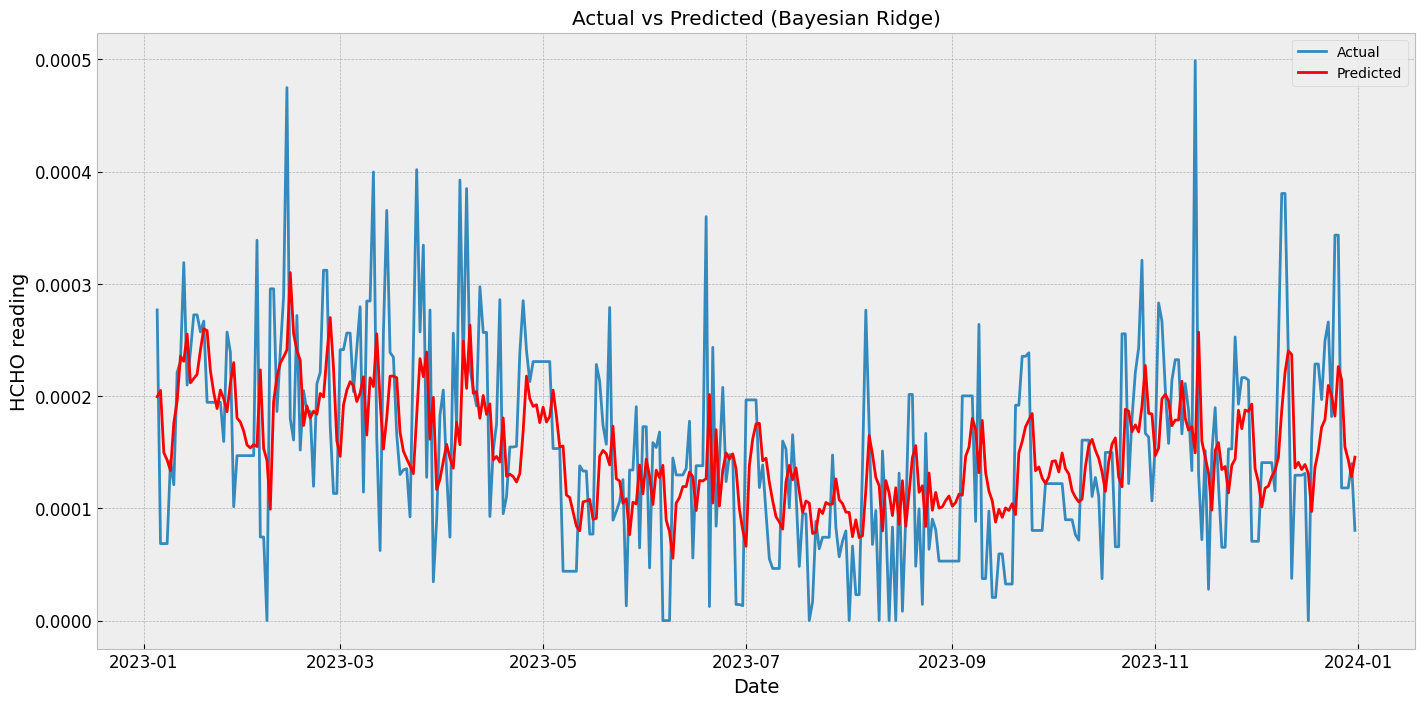

R2 Score (Bayesian Ridge): 0.25


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(kandy_test.index, y_test, label='Actual')
plt.plot(kandy_test.index, yhat, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (Bayesian Ridge)')
plt.legend()
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, yhat)
print(f'R2 Score (Bayesian Ridge): {r2:.2f}')


In [ ]:
# Lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train_imputed, y_train)
yhatt = reg.predict(X_test_imputed)
resultsDict['Lasso'] = evaluate(colombo_test['HCHO reading'], yhatt)
predictionsDict['Lasso'] = yhatt

NameError: name 'linear_model' is not defined

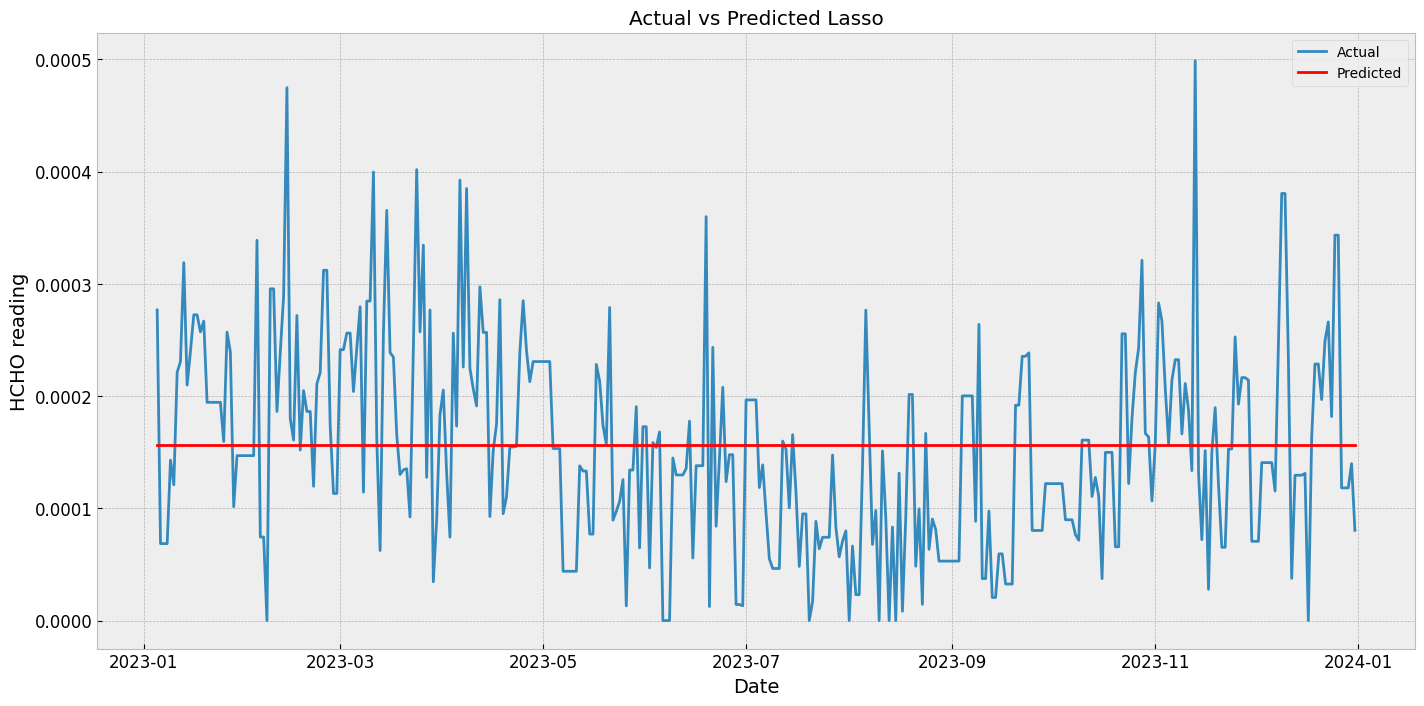

R2 Score (Lasso): -0.00


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(colombo_test.index, y_test, label='Actual')
plt.plot(colombo_test.index, yhatt, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted Lasso')
plt.legend()
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, yhatt)
print(f'R2 Score (Lasso): {r2:.2f}')

In [ ]:
# Tree models
# RandomForest
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train_imputed, y_train)
predictions_tree = reg.predict(X_test_imputed)

resultsDict['Randomforest'] = evaluate(colombo_test['HCHO reading'], predictions_tree)
predictionsDict['Randomforest'] = predictions_tree

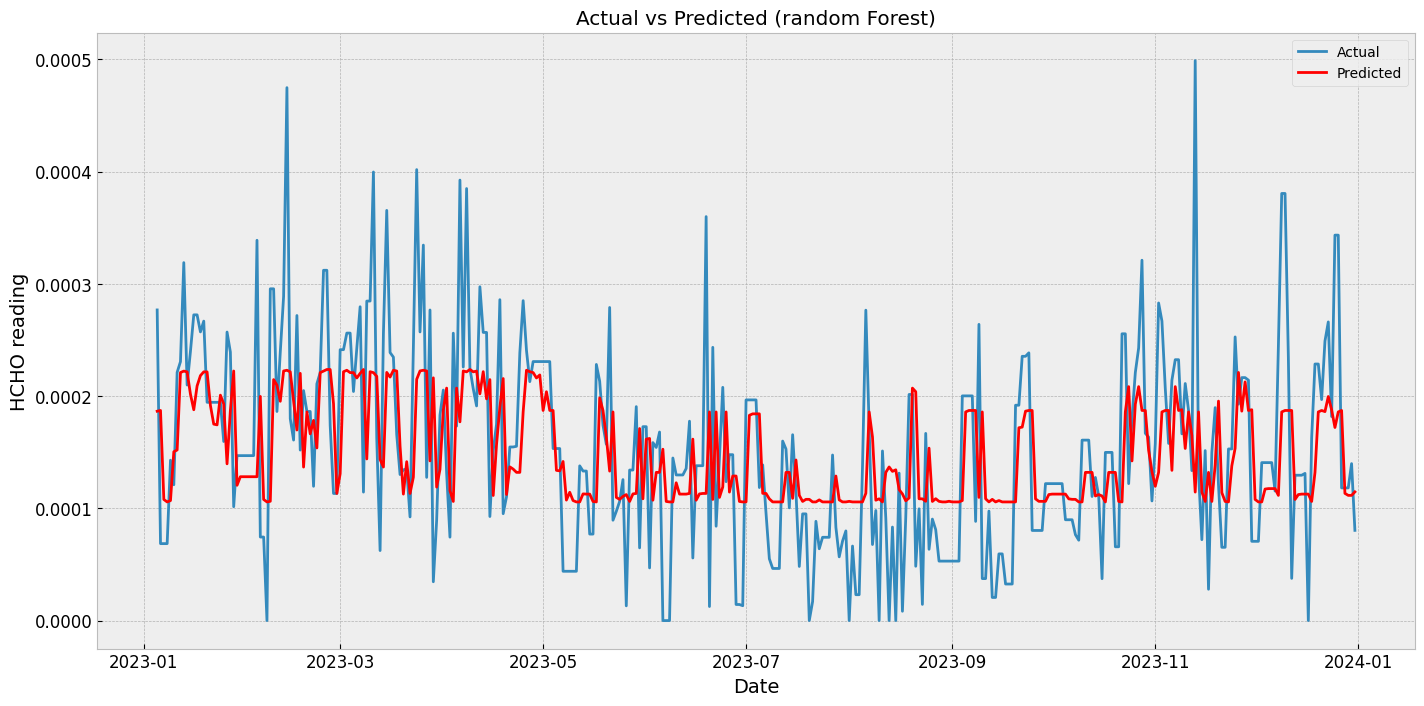

R2 Score (Bayesian Ridge): -0.00


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(17, 8))
plt.plot(colombo_test.index, y_test, label='Actual')
plt.plot(colombo_test.index, predictions_tree, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (random Forest)')
plt.legend()
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, yhat)
print(f'R2 Score (Bayesian Ridge): {r2:.2f}')

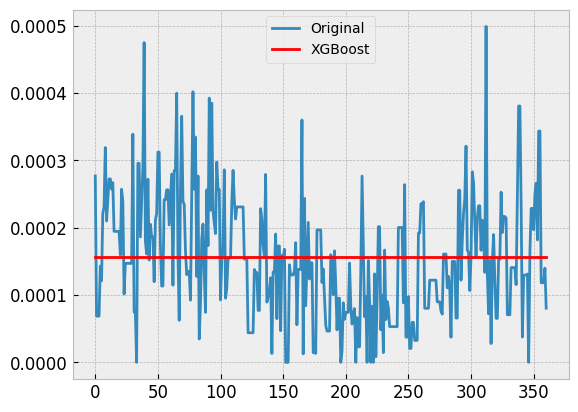

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train_imputed, y_train, verbose=False)
predictions_trees = reg.predict(X_test_imputed)
resultsDict['XGBoost'] = evaluate(colombo_test['HCHO reading'], predictions_trees)
predictionsDict['XGBoost'] = yhat

plt.plot(colombo_test['HCHO reading'].values, label='Original')
plt.plot(predictionsDict['XGBoost'], color='red', label='XGBoost')
plt.legend()
plt.show()

In [ ]:
# For our dl model we will create windows of data that will be fed into the datasets, for each timestamp T we will append the data from T-7 to T to the Xdata with target Y(t)
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarantee all samples have the window, so the new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)

In [ ]:
colombo_df.head()

Location   Next Date  HCHO reading  Specific Humidity  \
Current Date                                                                
2019-01-01    Colombo Proper  2019-01-02      0.000197              15.62   
2019-01-02    Colombo Proper  2019-01-03      0.000263              15.14   
2019-01-03    Colombo Proper  2019-01-04      0.000099              14.77   
2019-01-04    Colombo Proper  2019-01-05      0.000210              14.47   
2019-01-05    Colombo Proper  2019-01-06      0.000179              16.05   

              Relative Humidity  Precipitation  Temperature  Skin Temperature  
Current Date                                                                   
2019-01-01                80.00           0.12        24.80             25.29  
2019-01-02                79.50           0.02        24.39             25.01  
2019-01-03                78.50           0.01        24.17             24.73  
2019-01-04                77.62           0.00        24.04             24.57  
2019-01-05                81.50           0.03        24.87             25.33

In [ ]:
colombo_df.columns

Index(['Location', 'Next Date', 'HCHO reading', 'Specific Humidity',
       'Relative Humidity', 'Precipitation', 'Temperature',
       'Skin Temperature'],
      dtype='object')

In [ ]:
# File paths for each DataFrame CSV file
colombo_full_csv_path = '/content/drive/MyDrive/data engineering CW/colombo_df_full.csv'


# Load each DataFrame from the CSV file
colombo_df = pd.read_csv(colombo_full_csv_path, header=0, index_col=0)

In [ ]:
import numpy as np
import tensorflow as tf

# Join the datasets of train and test
X_w = colombo_training.drop(['Location','Next Date'], axis=1).values
y_w = colombo_training['HCHO reading'].values

# Convert y_w to float32 to match the data type expected by TensorFlow
y_w = y_w.astype(np.float32)

# Check the shape of the arrays
print("Shape of X_w:", X_w.shape)
print("Shape of y_w:", y_w.shape)

# Convert X_w and y_w to TensorFlow tensors for training data
X_w_tensor = tf.convert_to_tensor(X_w, dtype=tf.float32)
y_w_tensor = tf.convert_to_tensor(y_w, dtype=tf.float32)

# Create the train dataset
train_data = tf.data.Dataset.from_tensor_slices((X_w_tensor, y_w_tensor))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()


Shape of X_w: (1462, 6)
Shape of y_w: (1462,)


In [ ]:
# Assuming you have another DataFrame called test_df
X_test_w = colombo_test.drop([ 'Location', 'Next Date'], axis=1).values
y_test_w = colombo_test['HCHO reading'].values

In [ ]:
# Convert X_test_w and y_test_w to TensorFlow tensors for validation data
X_test_w_tensor = tf.convert_to_tensor(X_test_w, dtype=tf.float32)
y_test_w_tensor = tf.convert_to_tensor(y_test_w, dtype=tf.float32)

# Create the validation dataset
val_data = tf.data.Dataset.from_tensor_slices((X_test_w_tensor, y_test_w_tensor))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0

simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        64, input_shape=(X_w.shape[1], 1), dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 5

model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)

yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]



Epoch 1/5
200/200 [==============================] - 3s 6ms/step - loss: 0.0864 - val_loss: 0.0773
Epoch 2/5
200/200 [==============================] - 1s 4ms/step - loss: 0.0371 - val_loss: 0.0440
Epoch 3/5
200/200 [==============================] - 1s 4ms/step - loss: 0.0169 - val_loss: 0.0173
Epoch 4/5
200/200 [==============================] - 1s 4ms/step - loss: 0.0067 - val_loss: 0.0081
Epoch 5/5
12/12 [==============================] - 0s 2ms/step


In [ ]:
# Assuming you have defined evaluate function
resultsDict['Tensorflow simple LSTM'] = evaluate(y_test_w, yhat)
predictionsDict['Tensorflow simple LSTM'] = yhat

In [ ]:
print(X_test_w.dtype)

object


In [ ]:
print(y_test_w.dtype)

float32


In [ ]:
np.isnan(X_test_w).any()

True

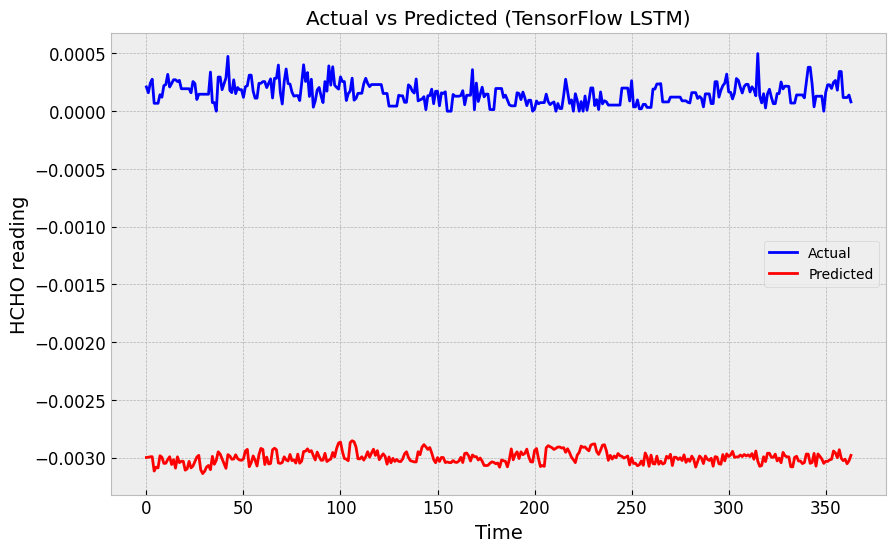

In [ ]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(y_test_w, label='Actual', color='blue')
plt.plot(yhat, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


In [ ]:
# Adjust dropout rate
dropout = 0.2

# Adjust LSTM layer units
lstm_units = 64

# Adjust Dense layer units
dense_units = 32

# Adjust the number of epochs
EPOCHS = 5

# Define the model
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(lstm_units, input_shape=(X_w.shape[1], 1), dropout=dropout),
    tf.keras.layers.Dense(dense_units, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
simple_lstm_model.compile(optimizer='adam', loss='mae')

# Train the model
model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)

# Evaluate the model and make predictions
yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]

# Assuming you have defined evaluate function
resultsDict['Tensorflow simple LSTM'] = evaluate(y_test_w, yhat)
predictionsDict['Tensorflow simple LSTM'] = yhat

Epoch 1/10
200/200 [==============================] - 8s 16ms/step - loss: 0.0171 - val_loss: 0.0030
Epoch 2/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0057 - val_loss: 0.0126
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0072 - val_loss: 0.0057
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0057 - val_loss: 0.0070
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0058 - val_loss: 0.0072
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0065 - val_loss: 0.0030
Epoch 7/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0055 - val_loss: 0.0123
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 9/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 10/10
12/12 [==============================] - 0s 3ms/step


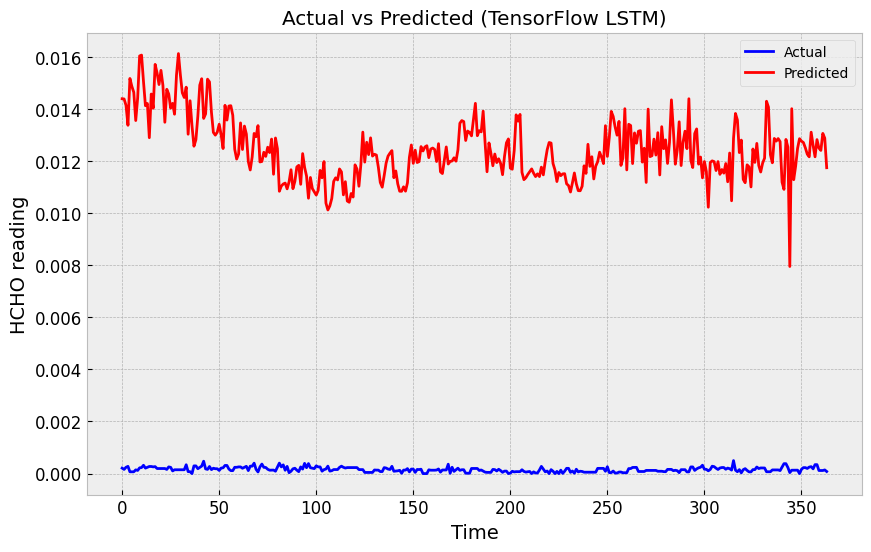

In [ ]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(y_test_w, label='Actual', color='blue')
plt.plot(yhat, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a dataset called 'colombo_df'
# Drop non-numeric columns
colombo_df_numeric = colombo_df.drop(['Location',  'Next Date'], axis=1)

# split the dataset into train and test
train_size = 1223
test_size = 603
train, test = colombo_df_numeric.iloc[0:train_size], colombo_df_numeric.iloc[train_size:]

# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back]['HCHO reading'])
    return np.array(dataX), np.array(dataY)

# reshape the dataset X = current time, and Yt+1 = future time period
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



# Convert trainX to float32 and reshape
trainX = np.reshape(trainX.astype('float32'), (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX.astype('float32'), (testX.shape[0], testX.shape[2], testX.shape[1]))

# Convert trainY and testY to float32
trainY = trainY.astype('float32')
testY = testY.astype('float32')

# let's create a RNN or LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model.fit(trainX, trainY, batch_size=1, epochs=10, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



Epoch 1/10
1221/1221 - 11s - loss: 0.0231 - 11s/epoch - 9ms/step
Epoch 2/10
1221/1221 - 4s - loss: 4.4087e-06 - 4s/epoch - 3ms/step
Epoch 3/10
1221/1221 - 3s - loss: 2.4104e-06 - 3s/epoch - 3ms/step
Epoch 4/10
1221/1221 - 4s - loss: 1.1147e-06 - 4s/epoch - 4ms/step
Epoch 5/10
1221/1221 - 3s - loss: 4.7259e-07 - 3s/epoch - 2ms/step
Epoch 6/10
1221/1221 - 3s - loss: 2.6111e-07 - 3s/epoch - 2ms/step
Epoch 7/10
1221/1221 - 3s - loss: 1.1317e-07 - 3s/epoch - 3ms/step
Epoch 8/10
1221/1221 - 5s - loss: 1.1914e-07 - 5s/epoch - 4ms/step
Epoch 9/10
1221/1221 - 3s - loss: 1.5949e-07 - 3s/epoch - 3ms/step
Epoch 10/10
1221/1221 - 3s - loss: 1.9437e-07 - 3s/epoch - 2ms/step
19/19 [==============================] - 0s 2ms/step


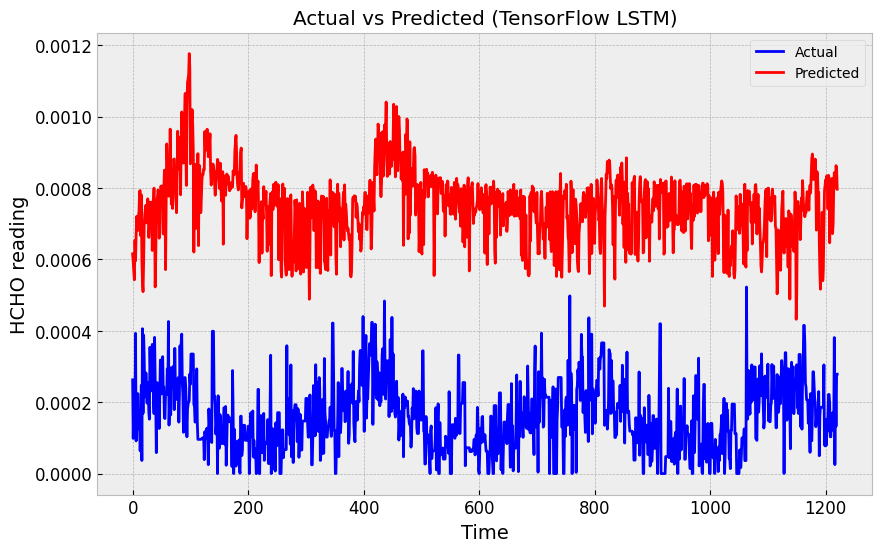

In [ ]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(trainY, label='Actual', color='blue')
plt.plot(trainPredict, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


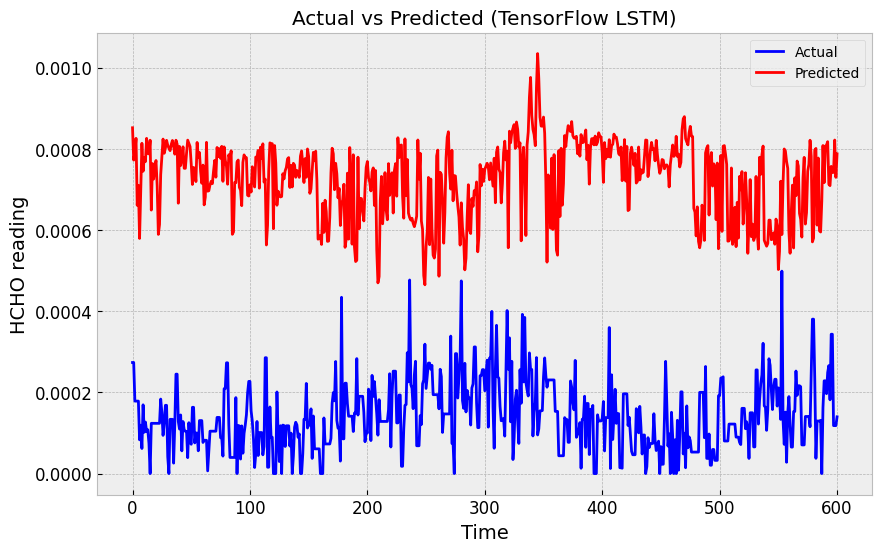

In [ ]:
import matplotlib.pyplot as plt

# Plot the original test data
plt.figure(figsize=(10, 6))
plt.plot(testY, label='Actual', color='blue')
plt.plot(testPredict, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.title('Actual vs Predicted (TensorFlow LSTM)')
plt.legend()
plt.show()


In [ ]:
print(trainY.shape)
print(testY.shape)

(1221,)
(601,)


In [ ]:
print(train_size)

1223
